In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
% config InlineBackend.figure_format = 'png'
% matplotlib inline
from scipy.stats import shapiro

In [41]:
train = pd.read_csv("income.csv",index_col=False)
train.columns = [c.replace(' ', '_') for c in train.columns]

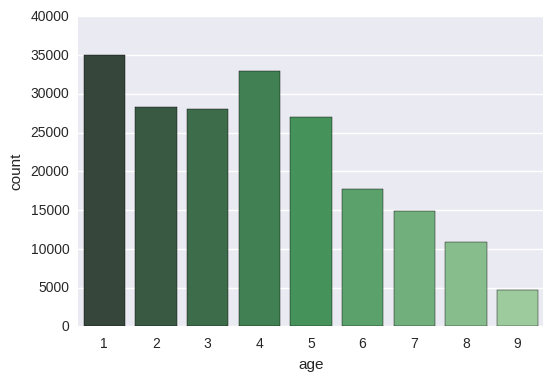

In [42]:
bins=[-1,10,20,30,40,50,60,70,80,90]
group_names=['1','2','3','4','5','6','7','8','9']
train['age'] = pd.cut(train['age'], bins, labels=group_names)
sns.countplot(x='age', data=train,palette="Greens_d")

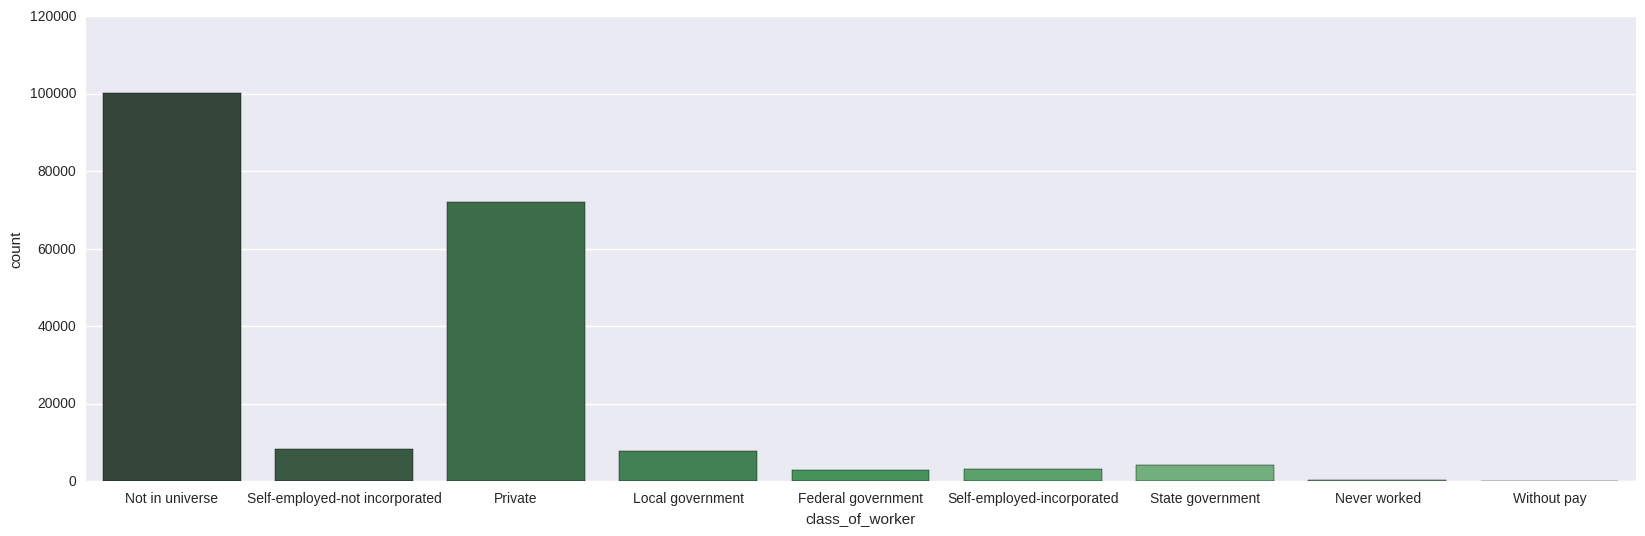

In [43]:
plt.rcParams['figure.figsize'] = (20.0, 6.0)
sns.countplot(x='class_of_worker', data=train,palette="Greens_d")
#data.loc[data.class_of_worker.isnull(), 'class_of_worker'] = data.loc[:, 'class_of_worker'].mode()[0]
train = train.replace(
    {
        'class_of_worker': 
        {
            'Not in universe': 4,
            'Private': 3,
            'Never worked': 0,
            'Without pay': 0,
            'Federal government': 1,
            'Self-employed-incorporated': 1,
            'State government': 2,
            'Local government': 2,
            'Self-employed-not incorporated': 2
        }
    }
)


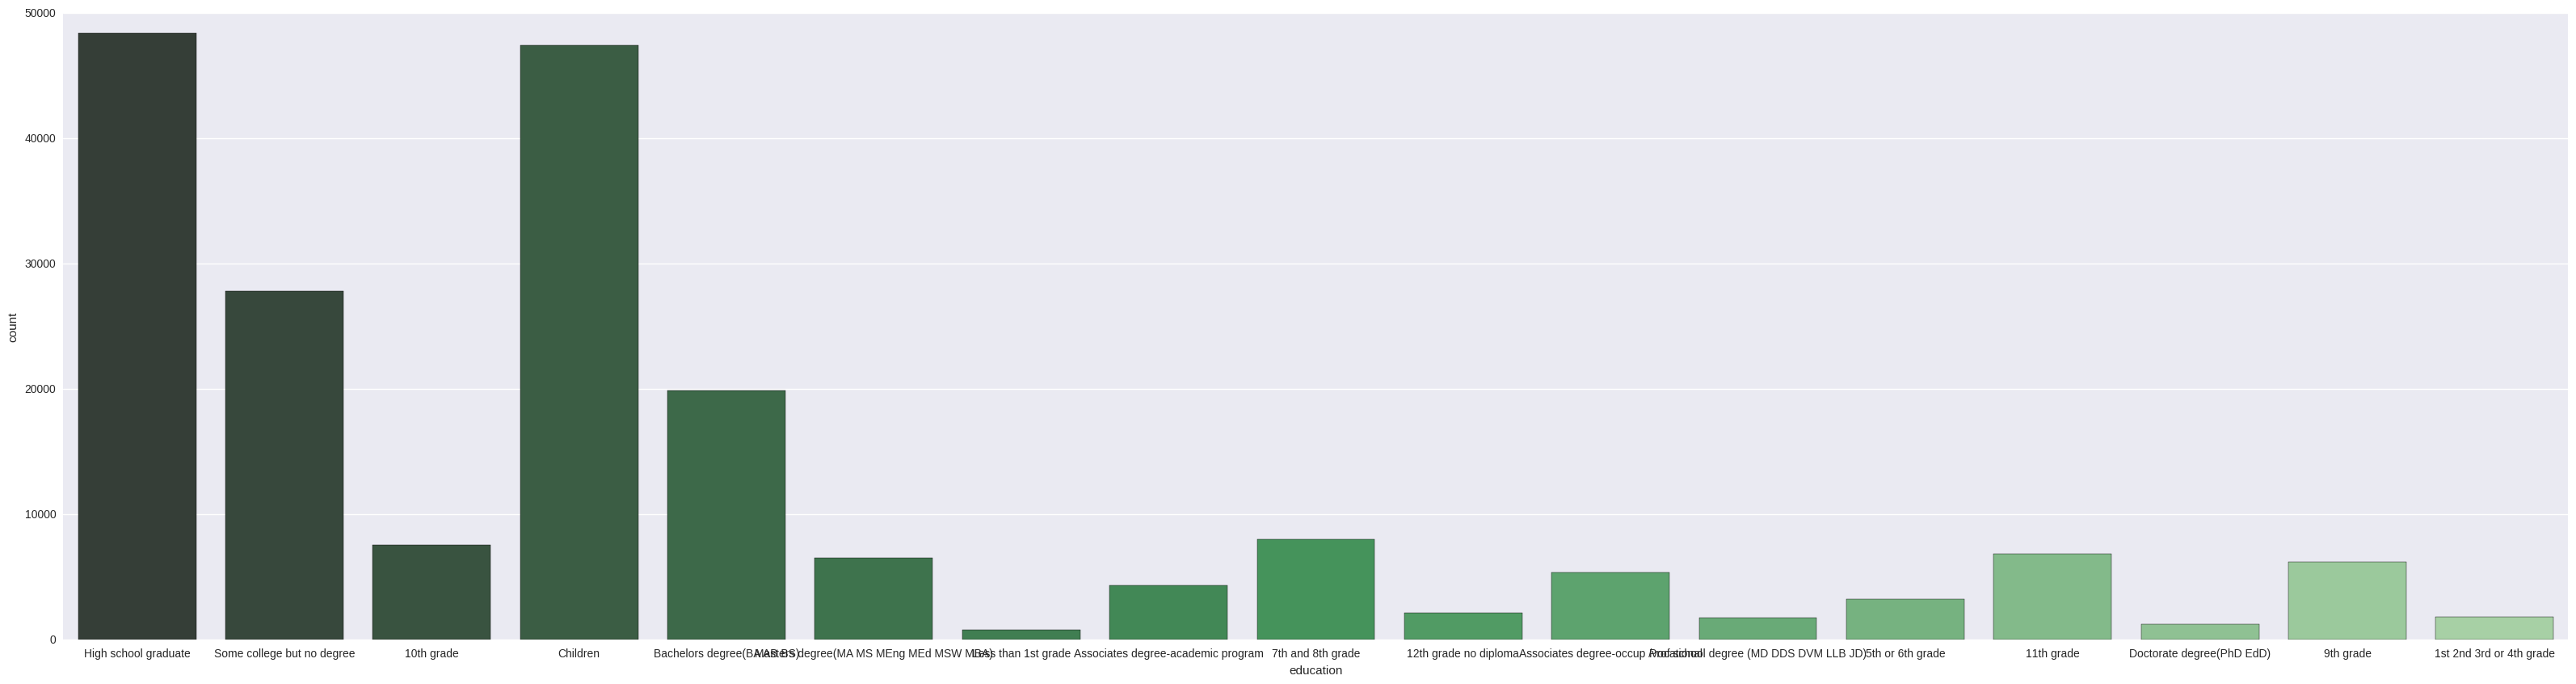

In [44]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
sns.countplot(x='education', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['education'])
#train = train.join('one_hot')
train['education'] = one_hot
#train= train.drop('education', axis=1)
#train.rename(columns={'one_hot' : 'education'},
#  inplace=True
#)
#train['education']

In [45]:
#minval=train["wage_per_hour"].min()
#maxval=train["wage_per_hour"].max()
#print minval,maxval
#bins=[0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000]
#group_names=['0','1','2','3','4','5','6','7','8','9']
#train['wage_per_hour'] = pd.cut(train['wage_per_hour'], bins, labels=group_names)
#plt.rcParams['figure.figsize'] = (6.0, 5.0)
#sns.countplot(x='wage_per_hour', data=train,palette="Greens_d")
train=train.drop('wage_per_hour', axis=1)

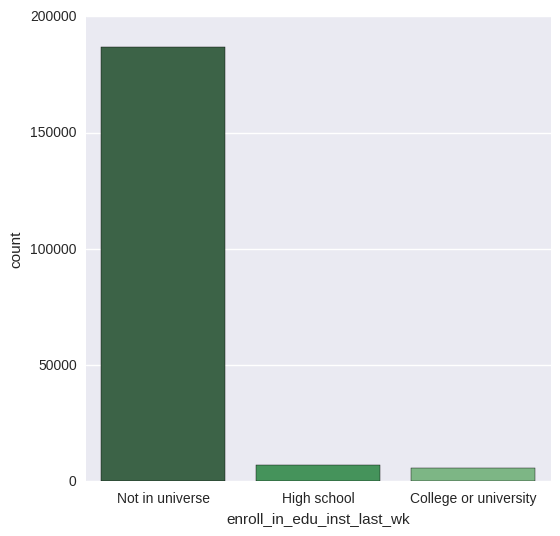

In [46]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.countplot(x='enroll_in_edu_inst_last_wk', data=train, palette="Greens_d")
#data.loc[data.enroll_in_edu_inst_last_wk.isnull(), 'enroll_in_edu_inst_last_wk'] = data.loc[:, 'enroll_in_edu_inst_last_wk'].mode()[0]
train = train.replace(
    {
        'enroll_in_edu_inst_last_wk': {
            'Not in universe': 1,
            'High school': 0,
            'College or university': 0,
        }
    }
)

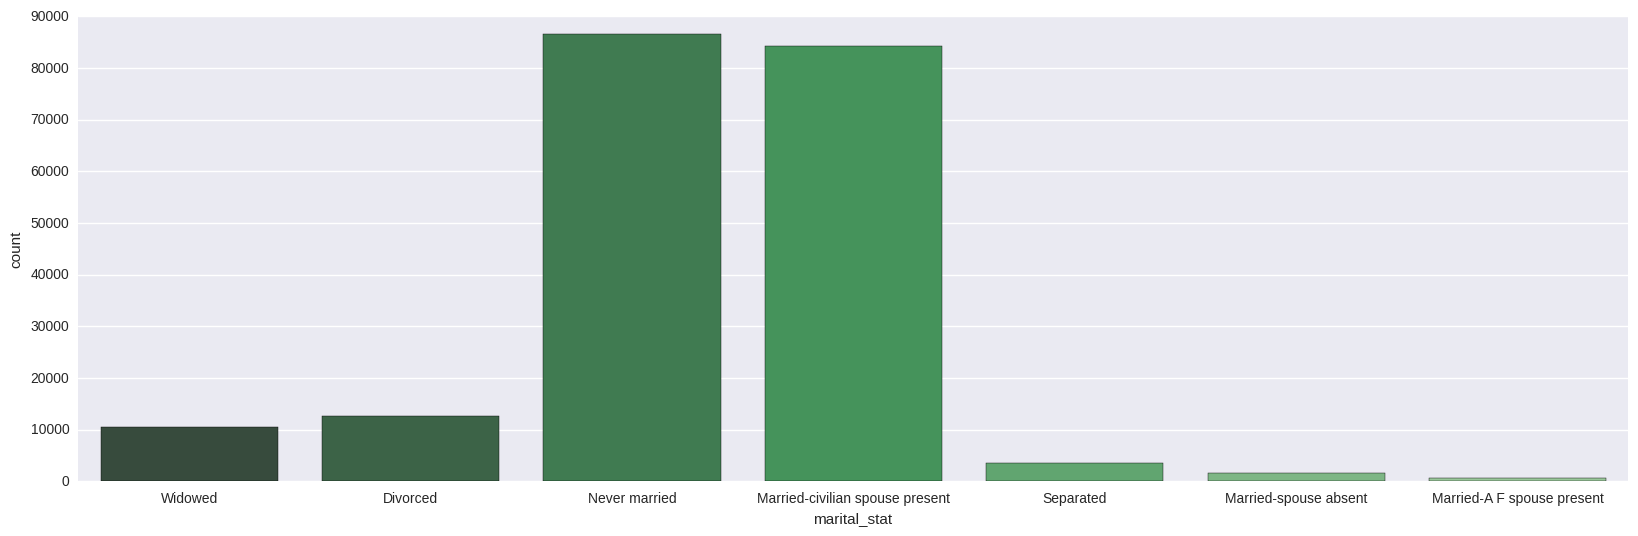

In [47]:
plt.rcParams['figure.figsize'] = (20.0, 6.0)
sns.countplot(x='marital_stat', data=train, palette="Greens_d")
#data.loc[data.marital_stat.isnull(), 'marital_stat'] = data.loc[:, 'marital_stat'].mode()[0]
train = train.replace(
    {
        'marital_stat': {
            'Married-A F spouse present': 0,
            'Separated': 1,
            'Married-spouse absent': 1,
            'Widowed': 2,
            'Divorced': 2,
            'Never married': 3,
            'Married-civilian spouse present': 3,
        }
    }
)

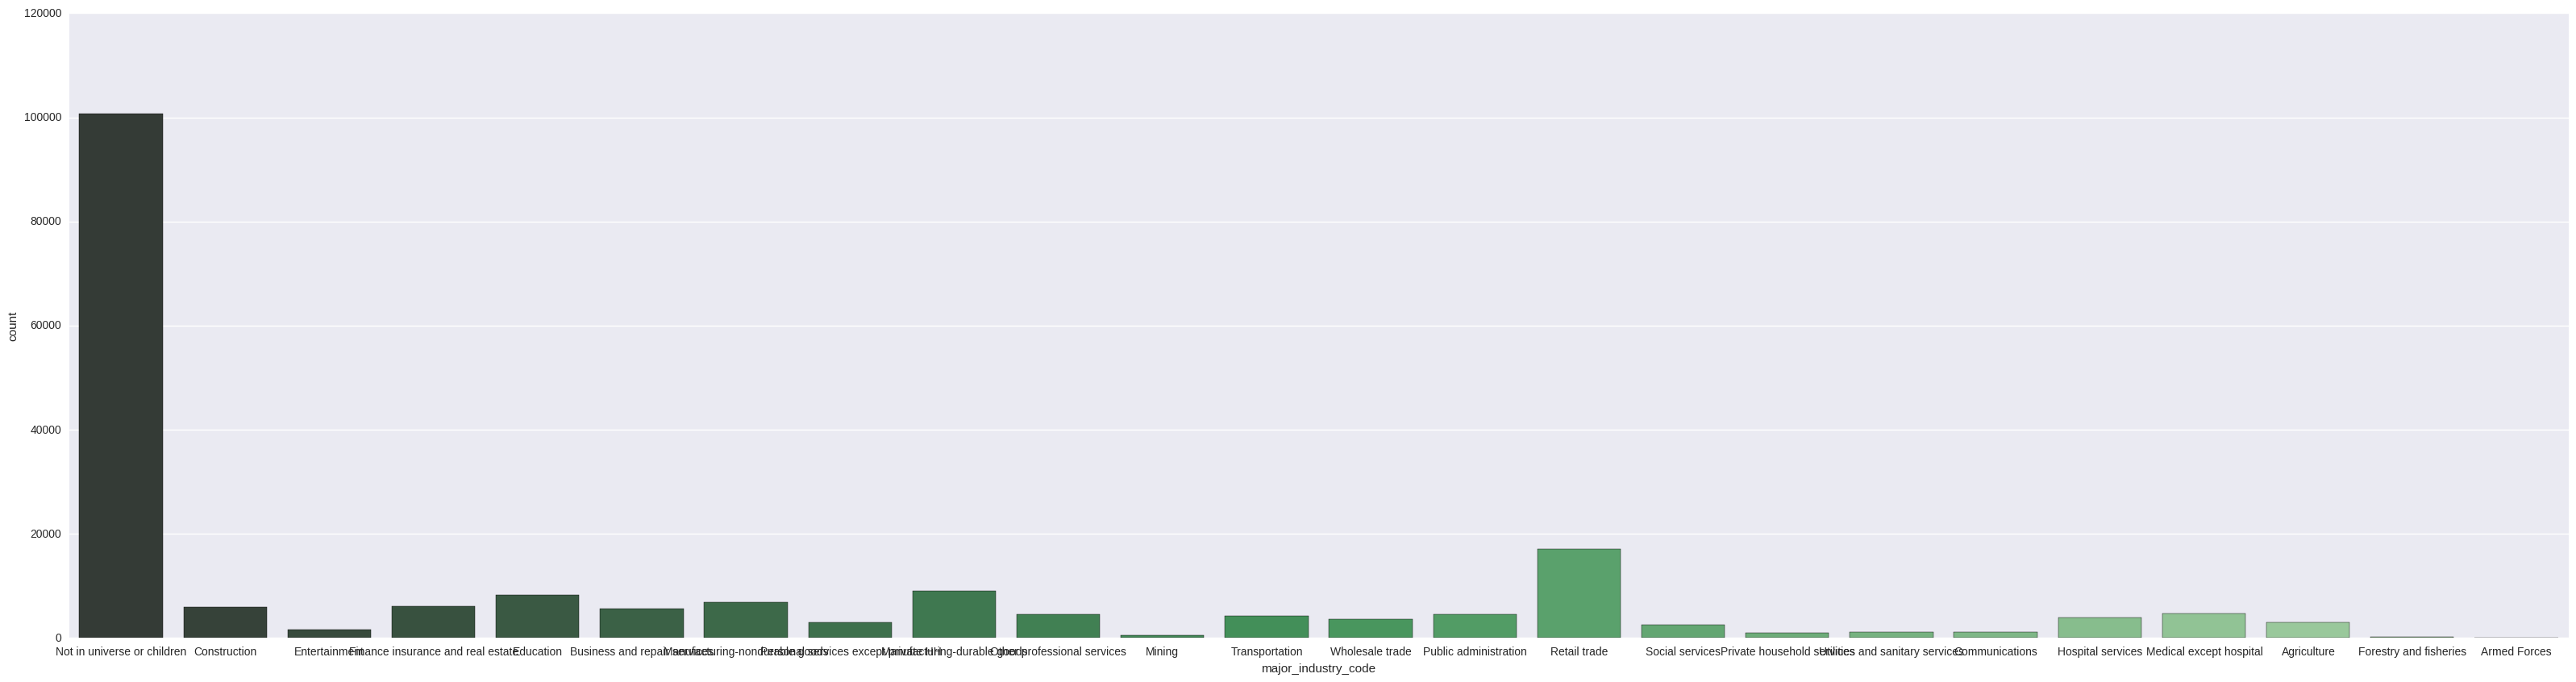

In [48]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
sns.countplot(x='major_industry_code', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['major_industry_code'])
#train = train.join('one_hot')
train['major_industry_code'] = one_hot

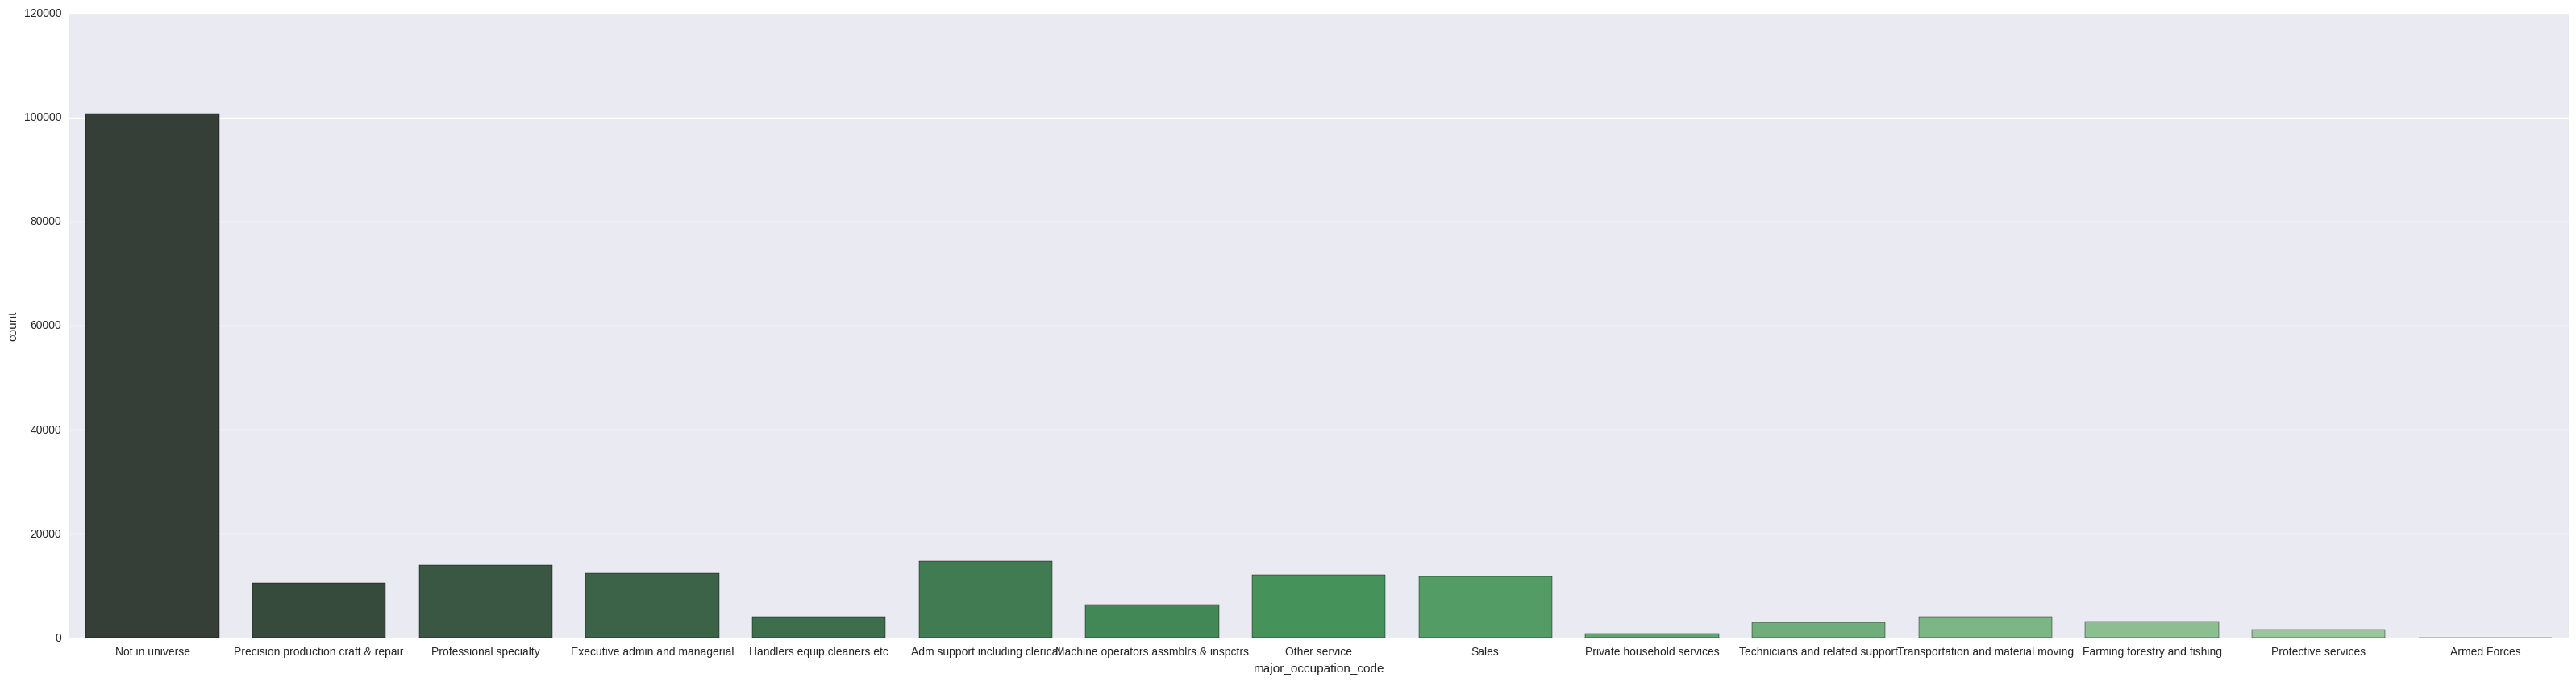

In [49]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
sns.countplot(x='major_occupation_code', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['major_occupation_code'])
#train = train.join('one_hot')
train['major_occupation_code'] = one_hot

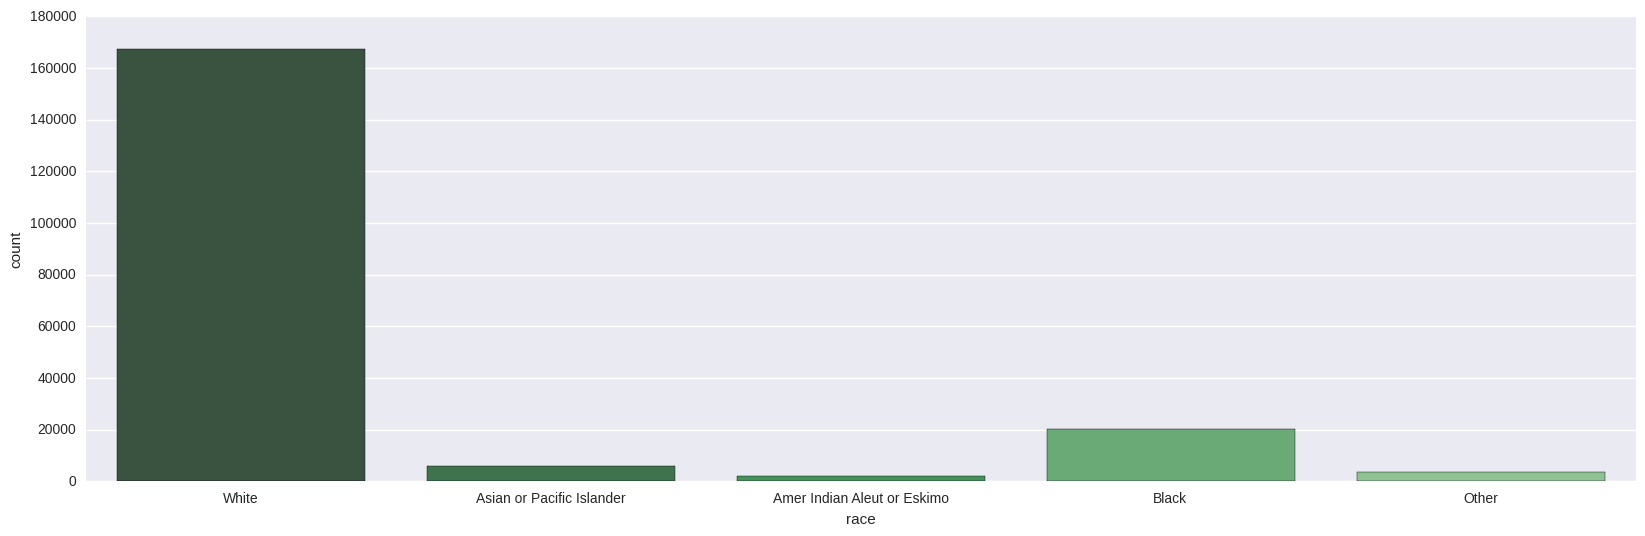

In [50]:
plt.rcParams['figure.figsize'] = (20.0, 6.0)
sns.countplot(x='race', data=train, palette="Greens_d")
#data.loc[data.race.isnull(), 'race'] = data.loc[:, 'race'].mode()[0]
train = train.replace(
    {
        'race': {
            'Other': 0,
            'Amer Indian Aleut or Eskimo': 0,
            'Asian or Pacific Islander': 1,
            'Black': 2,
            'White': 3,
        }
    }
)

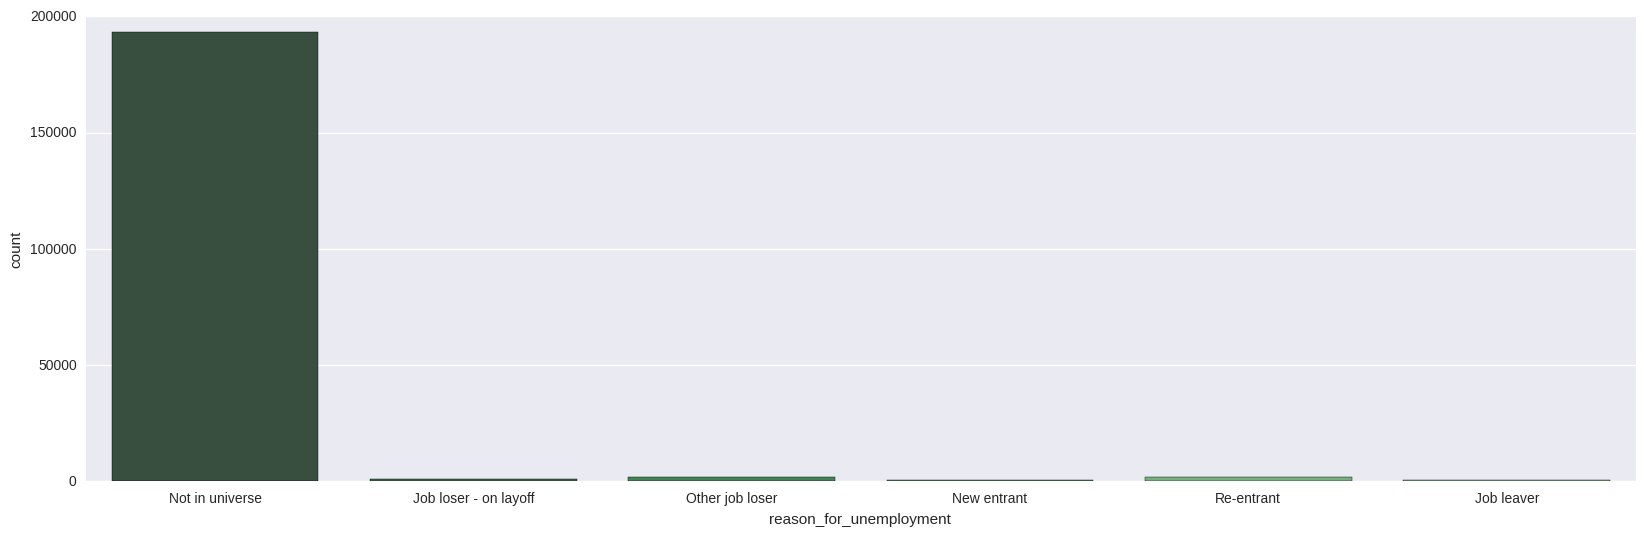

In [51]:
plt.rcParams['figure.figsize'] = (20.0, 6.0)
sns.countplot(x='reason_for_unemployment', data=train, palette="Greens_d")
#data.loc[data.race.isnull(), 'race'] = data.loc[:, 'race'].mode()[0]
train = train.replace(
    {
        'reason_for_unemployment': {
            'New entrant': 0,
            'Job leaver': 0,
            'Job loser - on layoff': 1,
            'Other job loser': 1,
            'Re-entrant': 1,
            'Not in universe': 2
        }
    }
)

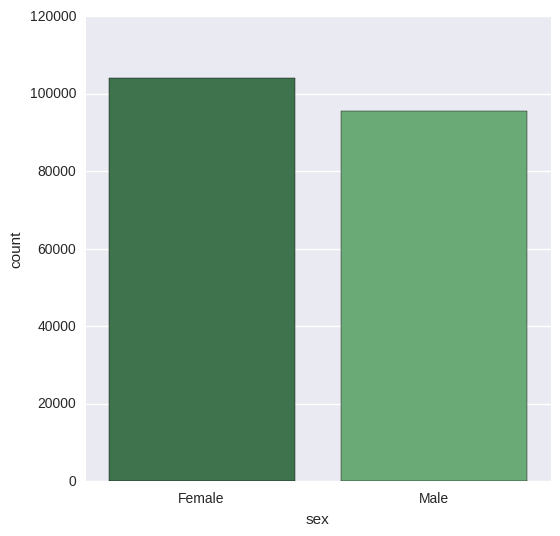

In [52]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.countplot(x='sex', data=train, palette="Greens_d")
#data.loc[data.sex.isnull(), 'sex'] = data.loc[:, 'sex'].mode()[0]
train = train.replace(
    {
        'sex': {
            'Female': 1,
            'Male': 0,
            }
    }
)

In [53]:
minval=train["capital_gains"].min()
maxval=train["capital_gains"].max()
print minval,maxval

0 99999


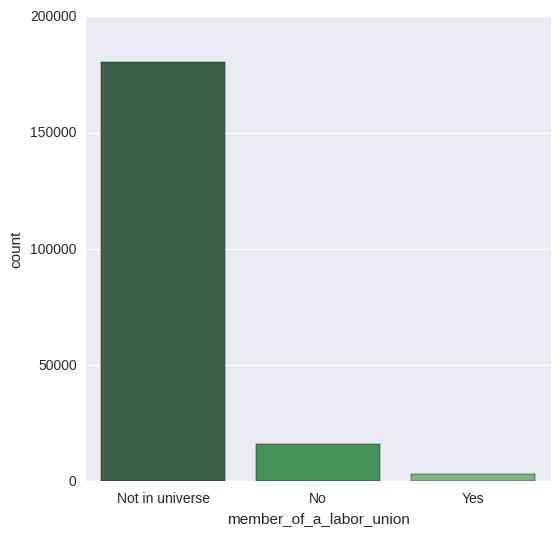

In [54]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sns.countplot(x='member_of_a_labor_union', data=train, palette="Greens_d")
#data.loc[data.member_of_a_labor_union.isnull(), 'member_of_labor_union'] = data.loc[:, 'member_of_a_labor_union'].mode()[0]
train = train.replace(
    {
        'member_of_a_labor_union': {
            'No': 1,
            'Yes': 0,
            'Not in universe': 2,
            }
    }
)

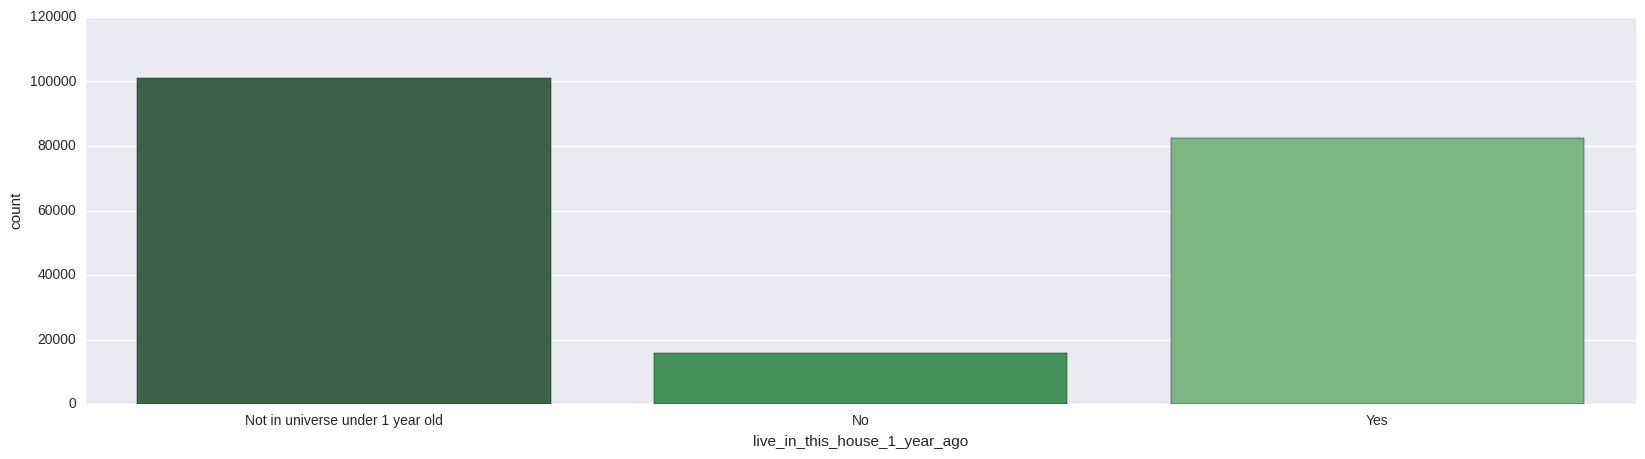

In [55]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='live_in_this_house_1_year_ago', data=train, palette="Greens_d")
#data.loc[data.live_in_this_house_1_year_ago.isnull(), 'live_in_this_house_1_year_ago'] =6
train = train.replace(
    {
        'live_in_this_house_1_year_ago': {
            'No': 0,
            'Yes': 1,
            'Not in universe under 1 year old': 2,
            }
    }
)
#print data.loc[:, 'live_in_this_house_1_year_ago'].mode()[0]

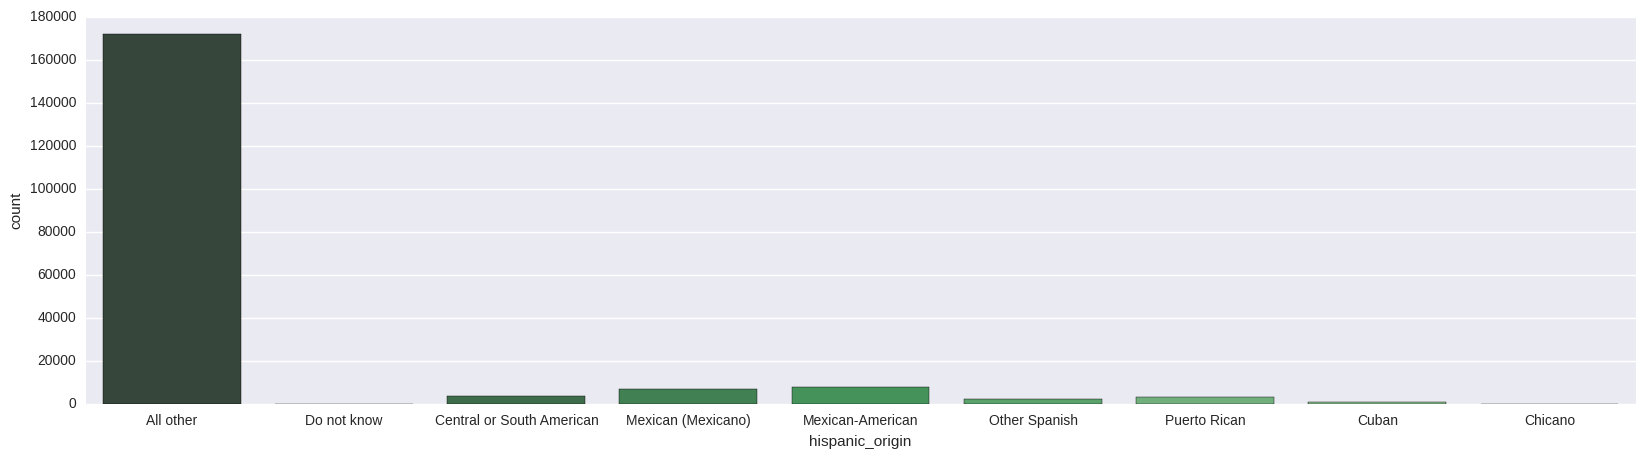

In [56]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='hispanic_origin', data=train, palette="Greens_d")
train= train.replace(
    {
        'hispanic_origin': {
            'Chicano': 0,
            'Do not know': 0,
            'Cuban': 0,
            'Central or South American': 1,
            'Other Spanish': 1,
            'Puerto Rican': 1,
            'Mexican (Mexicano)': 2,
            'Mexican-American': 2,
            'All other': 3
            }
    }
)

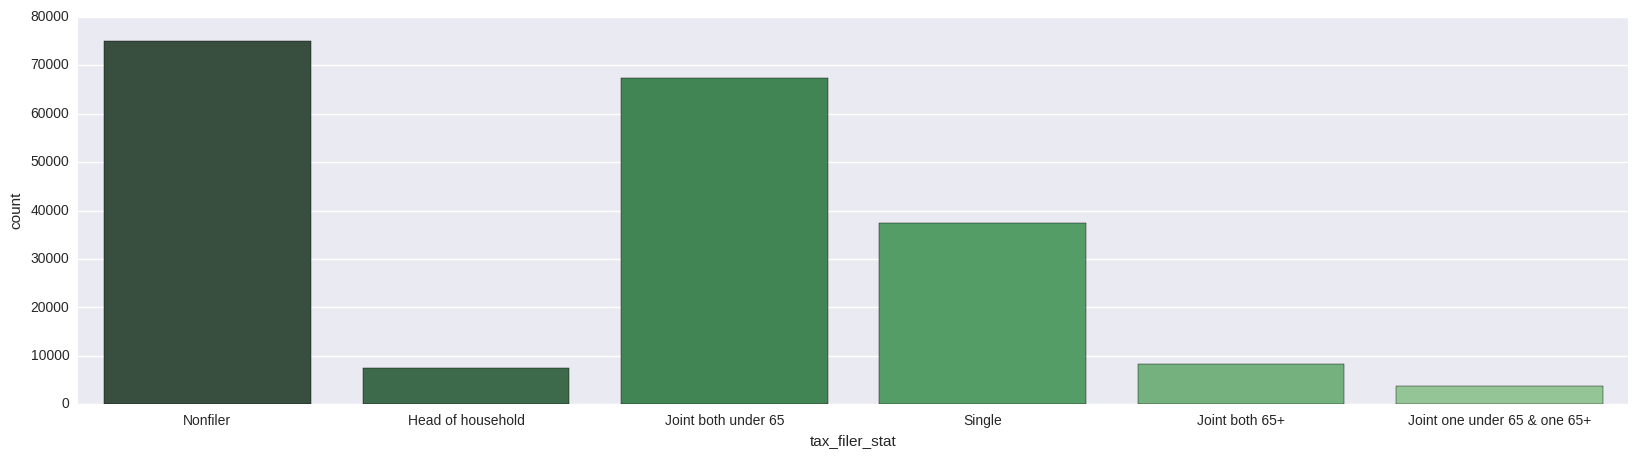

In [57]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='tax_filer_stat', data=train, palette="Greens_d")
train = train.replace(
    {
        'tax_filer_stat': {
            'Joint one under 65 & one 65+': 0,
            'Joint both 65+': 1,
            'Head of household': 1,
            'Single': 2,
            'Joint both under 65': 3,
            'Nonfiler': 4
            }
    }
)

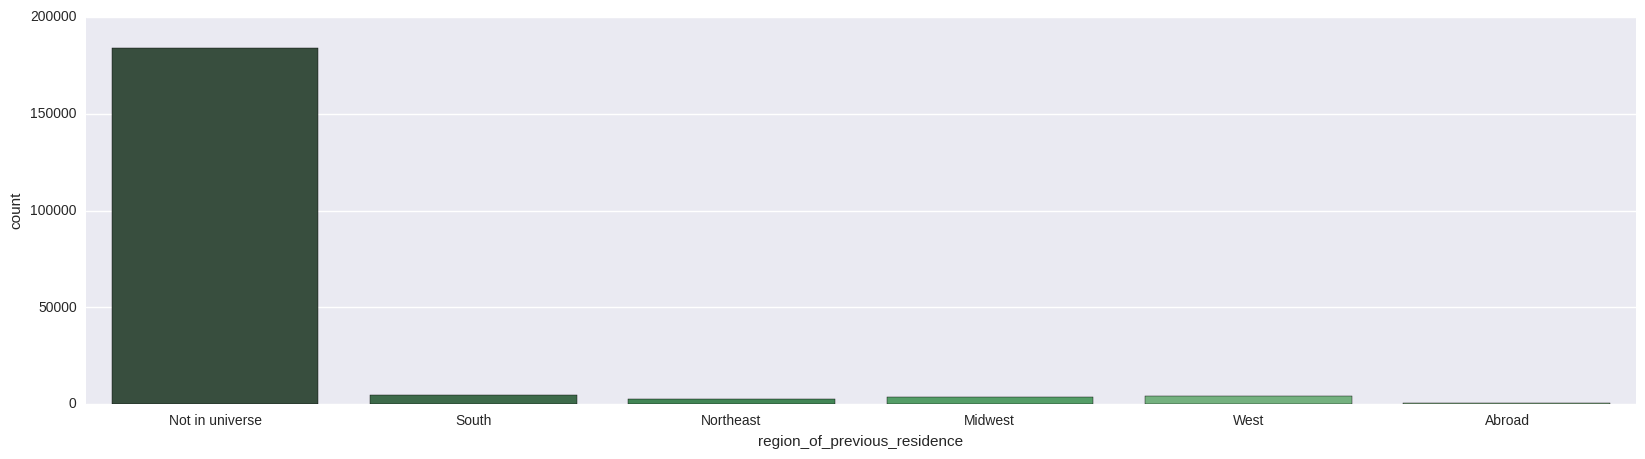

In [58]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='region_of_previous_residence', data=train, palette="Greens_d")
train = train.replace(
    {
        'region_of_previous_residence': {
            'Abroad': 0,
            'Northeast': 1,
            'South': 1,
            'West': 2,
            'Midwest': 3,
            'Not in universe': 4
            }
    }
)

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
199493    0.0
199494    0.0
199495    0.0
199496    0.0
199497    0.0
199498    0.0
199499    0.0
199500    0.0
199501    0.0
199502    0.0
199503    0.0
199504    0.0
199505    0.0
199506    0.0
199507    0.0
199508    0.0
199509    0.0
199510    0.0
199511    0.0
199512    0.0
199513    0.0
199514    0.0
199515    0.0
199516    0.0
199517    0.0
199518    0.0
199519    0.0
199520    0.0
199521    0.0
199522    0.0
Name: state_of_previous_residence, dtype: float64

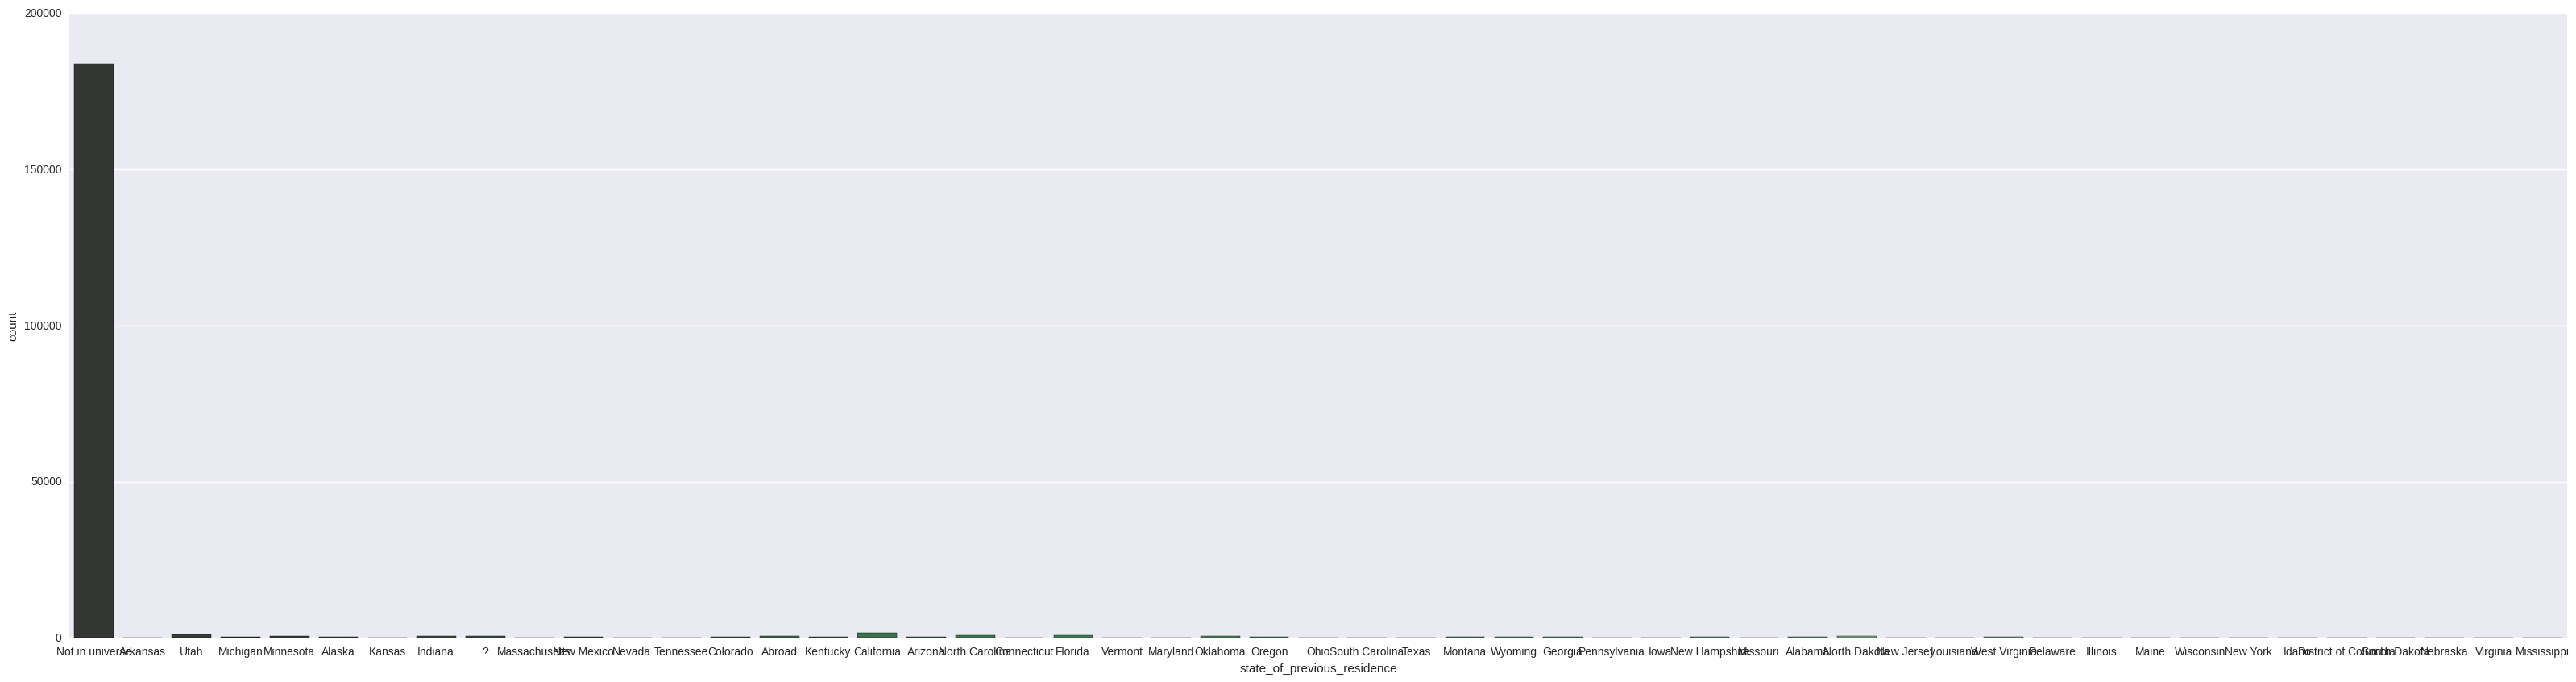

In [59]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
sns.countplot(x='state_of_previous_residence', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['state_of_previous_residence'])
#train = train.join('one_hot')
train['state_of_previous_residence'] = one_hot
train['state_of_previous_residence']

In [60]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
#sns.countplot(x='detailed_household_and_family_stat', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['detailed_household_and_family_stat'])
#train = train.join('one_hot')
train['detailed_household_and_family_stat'] = one_hot
train['detailed_household_and_family_stat']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         0.0
7         0.0
8         0.0
9         0.0
10        0.0
11        0.0
12        0.0
13        0.0
14        0.0
15        0.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        0.0
22        0.0
23        0.0
24        0.0
25        0.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
199493    0.0
199494    0.0
199495    0.0
199496    0.0
199497    0.0
199498    0.0
199499    0.0
199500    0.0
199501    0.0
199502    0.0
199503    0.0
199504    0.0
199505    0.0
199506    0.0
199507    0.0
199508    0.0
199509    0.0
199510    0.0
199511    0.0
199512    0.0
199513    0.0
199514    0.0
199515    0.0
199516    0.0
199517    0.0
199518    0.0
199519    0.0
199520    0.0
199521    0.0
199522    0.0
Name: detailed_household_and_family_stat, dtype: float64

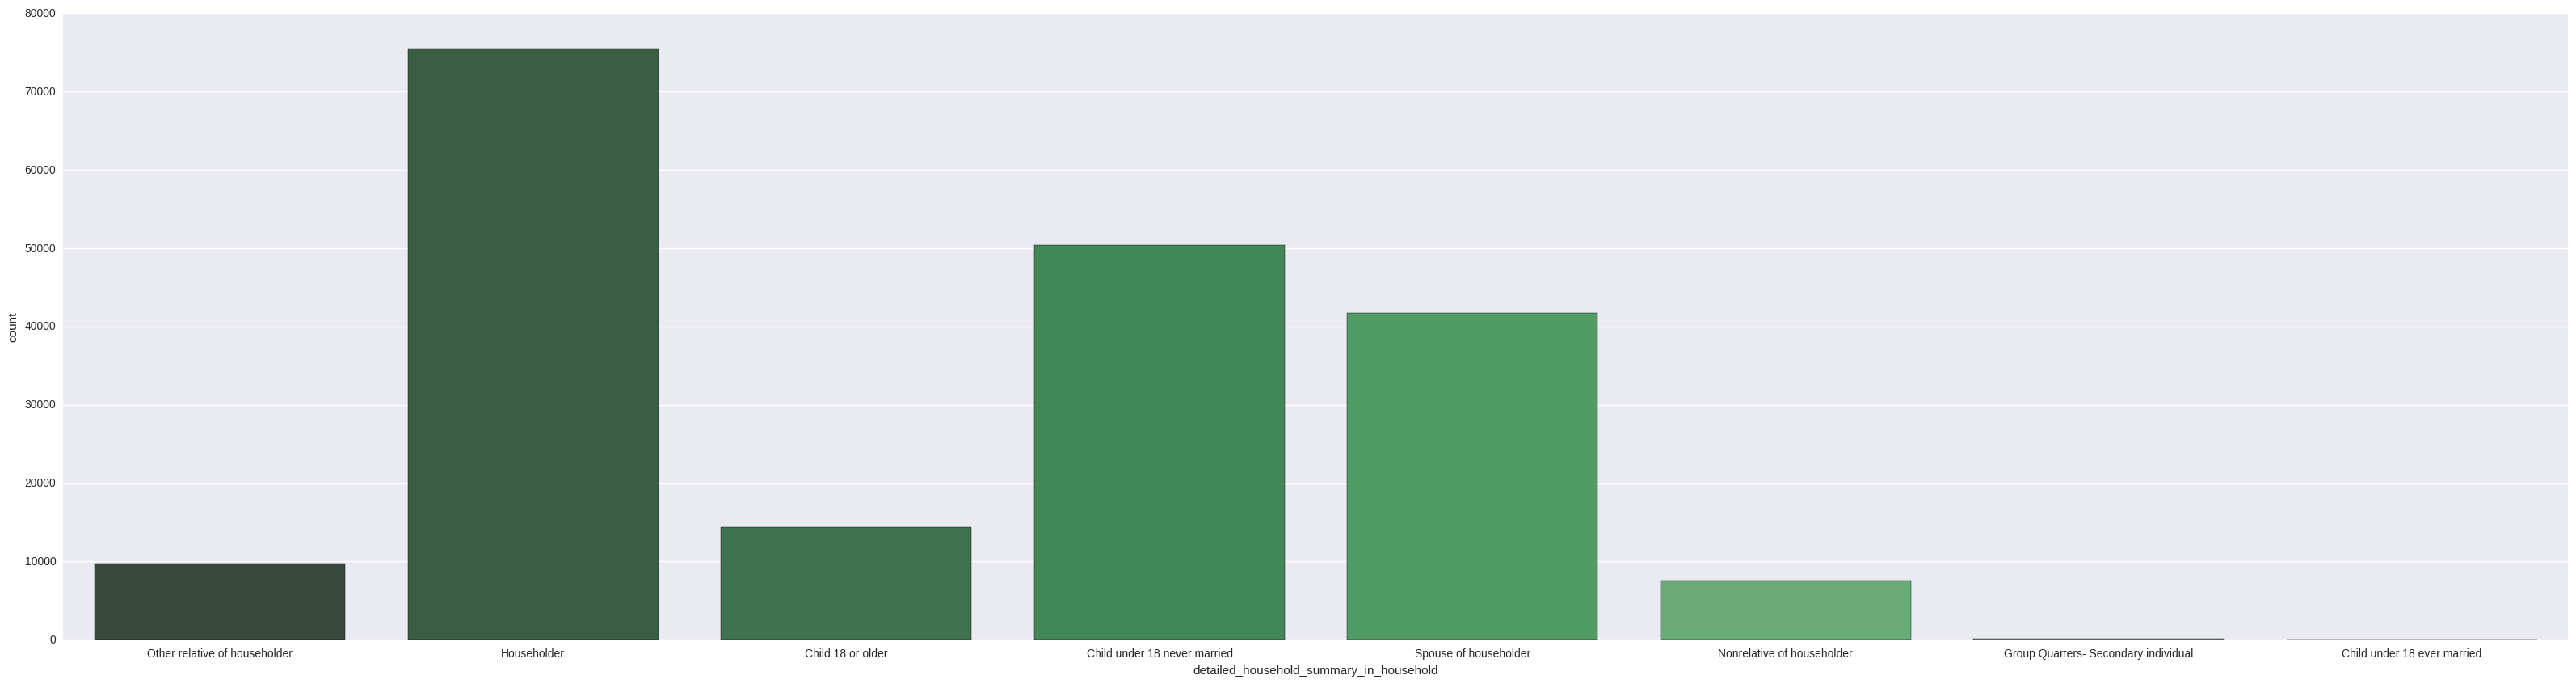

In [61]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
sns.countplot(x='detailed_household_summary_in_household', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['detailed_household_summary_in_household'])
#train = train.join('one_hot')
train['detailed_household_summary_in_household'] = one_hot

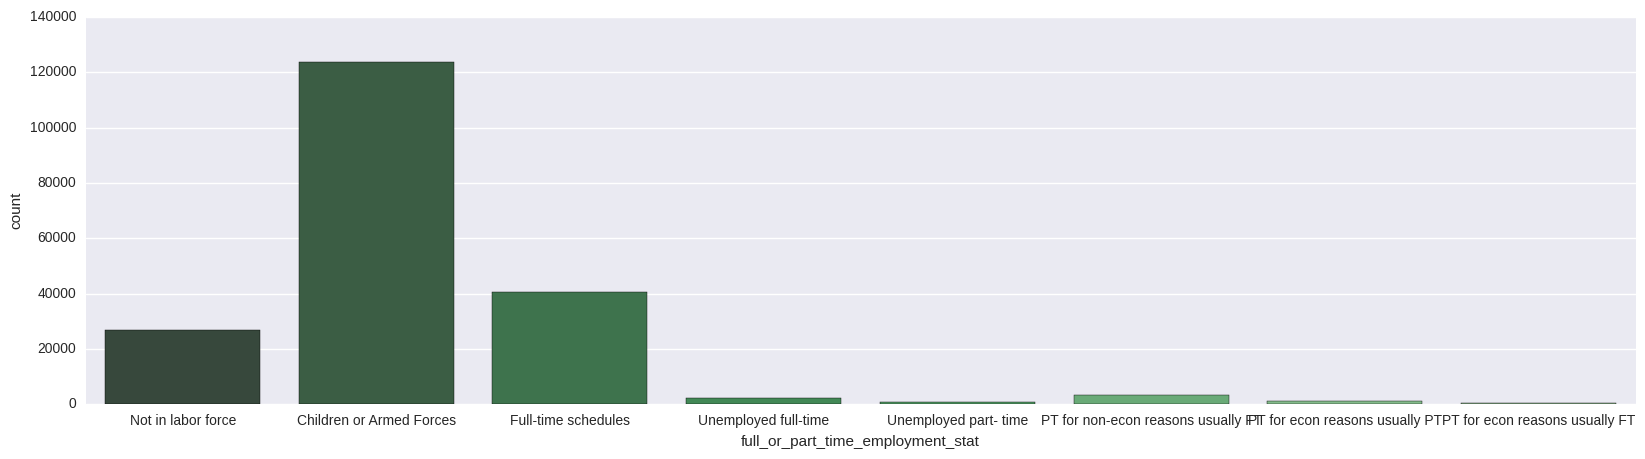

In [62]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='full_or_part_time_employment_stat', data=train, palette="Greens_d")
train = train.replace(
    {
        'full_or_part_time_employment_stat': {
            'PT for econ reasons usually FT': 0,
            'Unemployed part- time': 0,
            'PT for econ reasons usually PT': 0,
            'Unemployed full-time': 1,
            'PT for non-econ reasons usually FT': 1,
            'Not in labor force': 2,
            'Full-time schedules': 3,
            'Children or Armed Forces': 4
            }
    }
)

0 99999


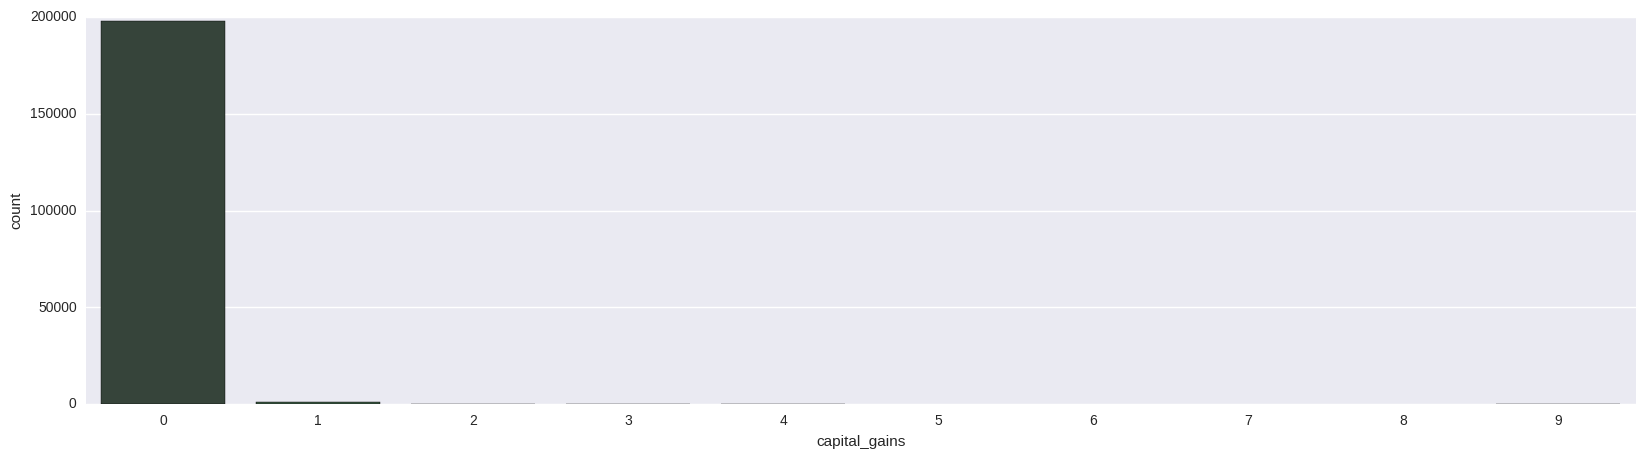

In [63]:
minval=train['capital_gains'].min()
maxval=train['capital_gains'].max()
print minval,maxval
bins=[-1,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
group_names=['0','1','2','3','4','5','6','7','8','9']
train['capital_gains'] = pd.cut(train['capital_gains'], bins, labels=group_names)
sns.countplot(x='capital_gains', data=train,palette="Greens_d")

0 4608


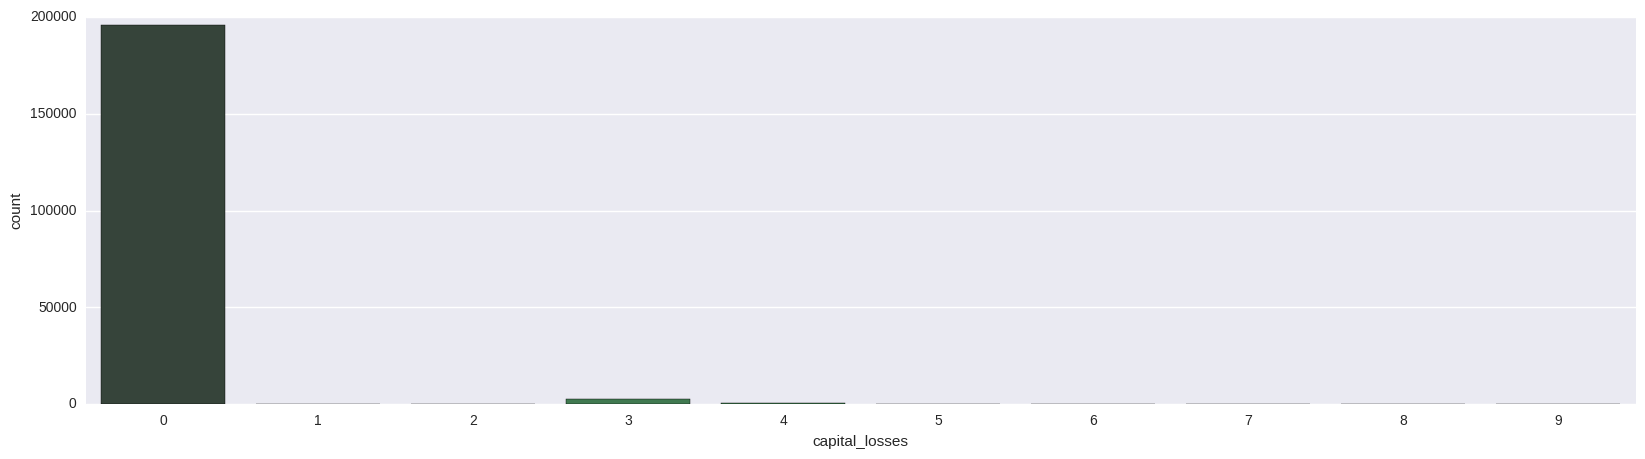

In [64]:
minval=train['capital_losses'].min()
maxval=train['capital_losses'].max()
print minval,maxval
bins=[-1,500,1000,1500,2000,2500,3000,3500,4000,4500,5000]
group_names=['0','1','2','3','4','5','6','7','8','9']
train['capital_losses'] = pd.cut(train['capital_losses'], bins, labels=group_names)
sns.countplot(x='capital_losses', data=train,palette="Greens_d")

0 99999


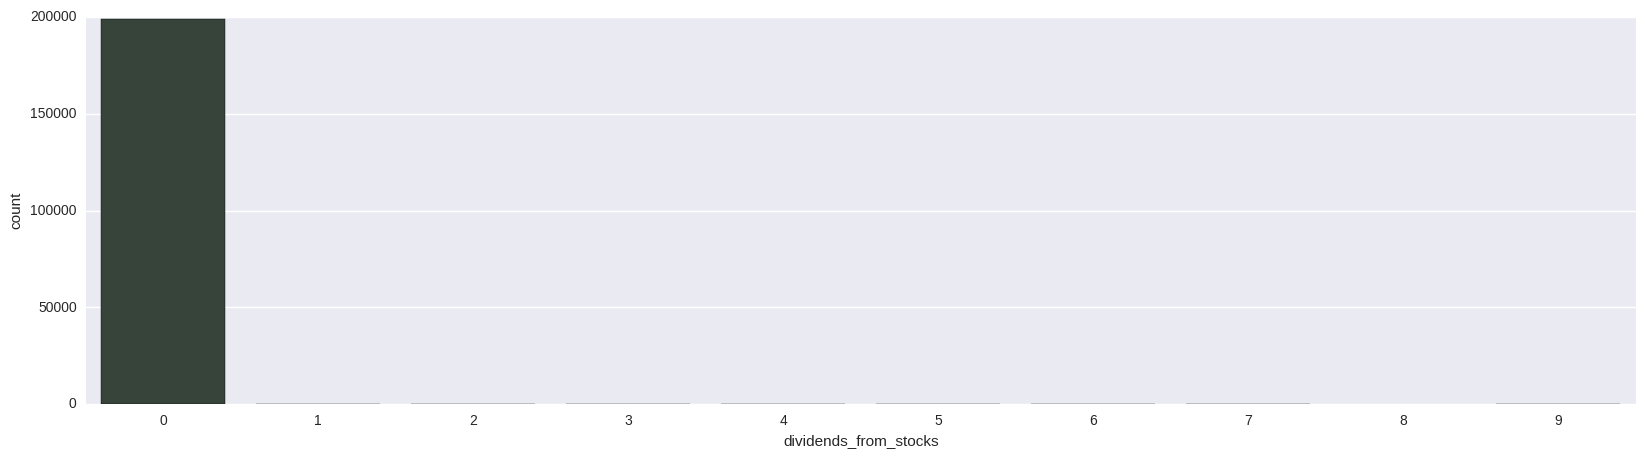

In [65]:
minval=train['dividends_from_stocks'].min()
maxval=train['dividends_from_stocks'].max()
print minval,maxval
bins=[-1,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000]
group_names=['0','1','2','3','4','5','6','7','8','9']
train['dividends_from_stocks'] = pd.cut(train['dividends_from_stocks'], bins, labels=group_names)
sns.countplot(x='dividends_from_stocks', data=train,palette="Greens_d")

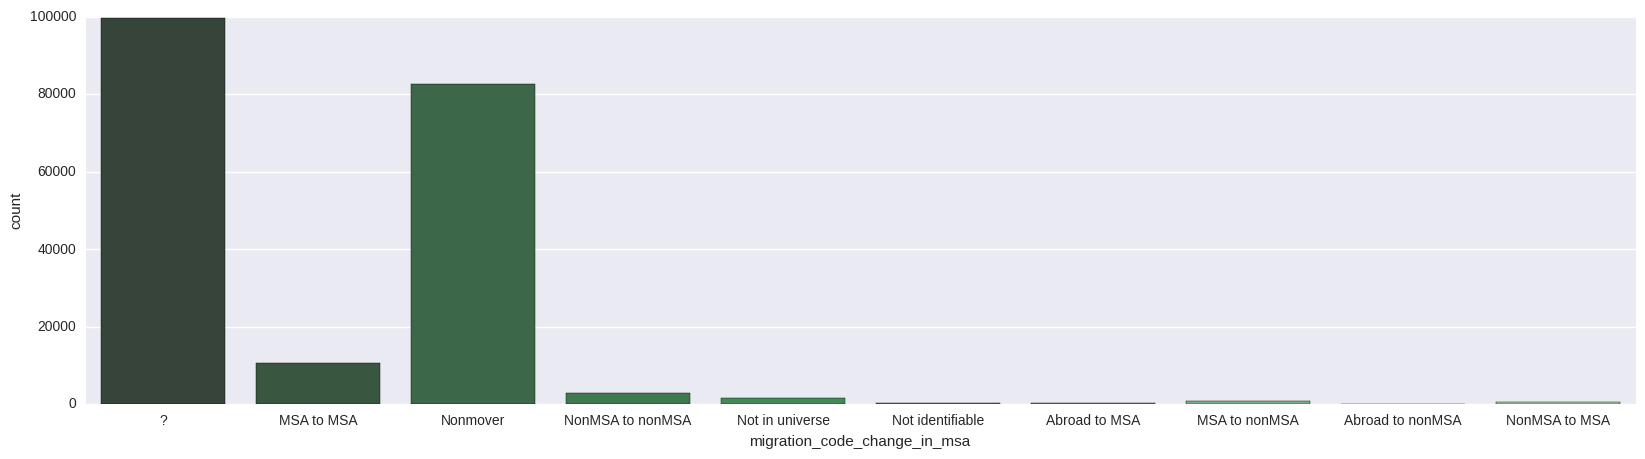

In [66]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='migration_code_change_in_msa', data=train, palette="Greens_d")
train.loc[train.migration_code_change_in_msa == '?', 'migration_code_change_in_msa'] = 'Nonmover'
train=train.replace(
    {
        'migration_code_change_in_msa': {
            'Abroad to nonMSA': 0,
            'NonMSA to MSA': 1,
            'MSA to nonMSA': 1,
            'Not identifiable': 1,
            'Abroad to MSA': 1,
            'Not in universe': 2,
            'NonMSA to nonMSA': 3,
            'MSA to MSA': 4,
            'Nonmover': 5
            }
    }
)

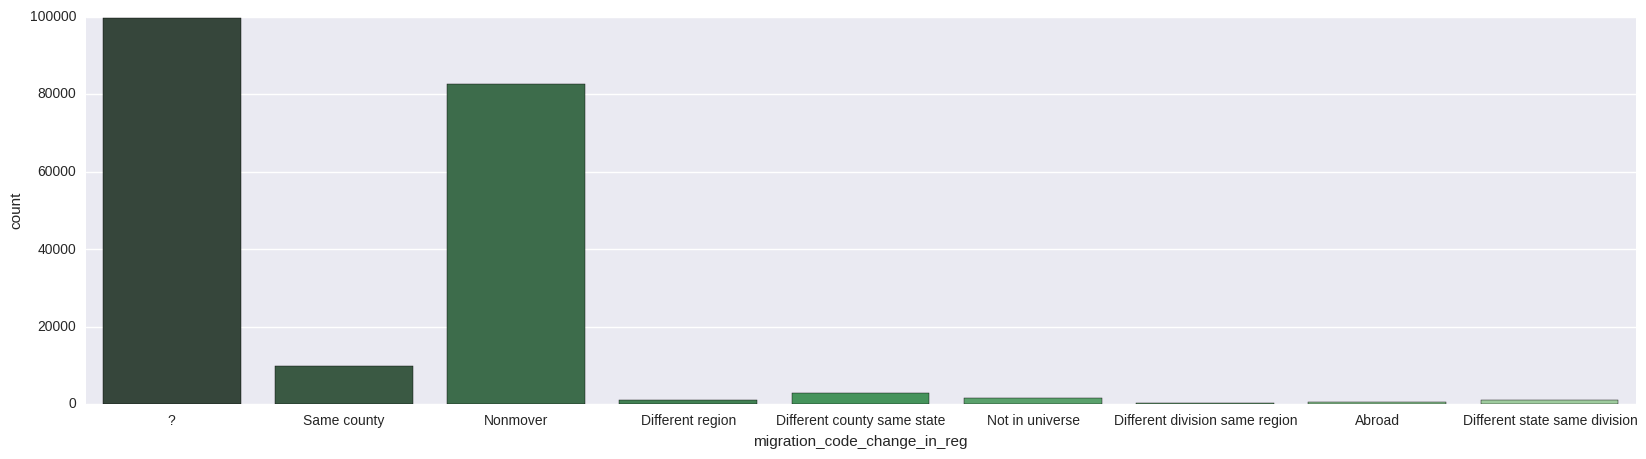

In [67]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='migration_code_change_in_reg', data=train, palette="Greens_d")
train.loc[train.migration_code_change_in_reg == '?', 'migration_code_change_in_reg'] = 'Nonmover'
train=train.replace(
    {
        'migration_code_change_in_reg': {
            'Different division same region': 0,
            'Abroad': 0,
            'Different region': 1,
            'Different state same division': 1,
            'Not in universe': 2,
            'Different county same state': 3,
            'Same county': 4,
            'Nonmover': 5
            }
    }
)

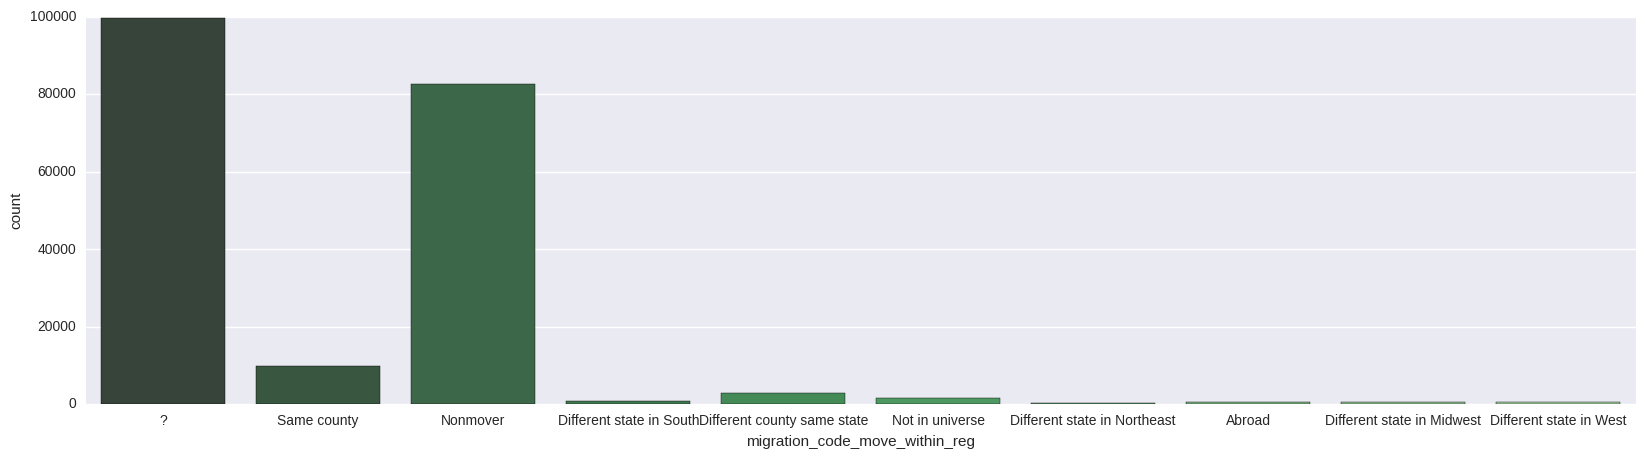

In [68]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='migration_code_move_within_reg', data=train, palette="Greens_d")
train.loc[train.migration_code_move_within_reg == '?', 'migration_code_move_within_reg'] = 'Nonmover'
train=train.replace(
    {
        'migration_code_move_within_reg': {
            'Different state in Northeast': 0,
            'Different state in South': 0,
            'Abroad': 0,
            'Different state in Midwest': 0,
            'Different state in West': 0,
            'Not in universe': 1,
            'Different county same state': 2,
            'Same county': 3,
            'Nonmover': 4
            }
    }
)

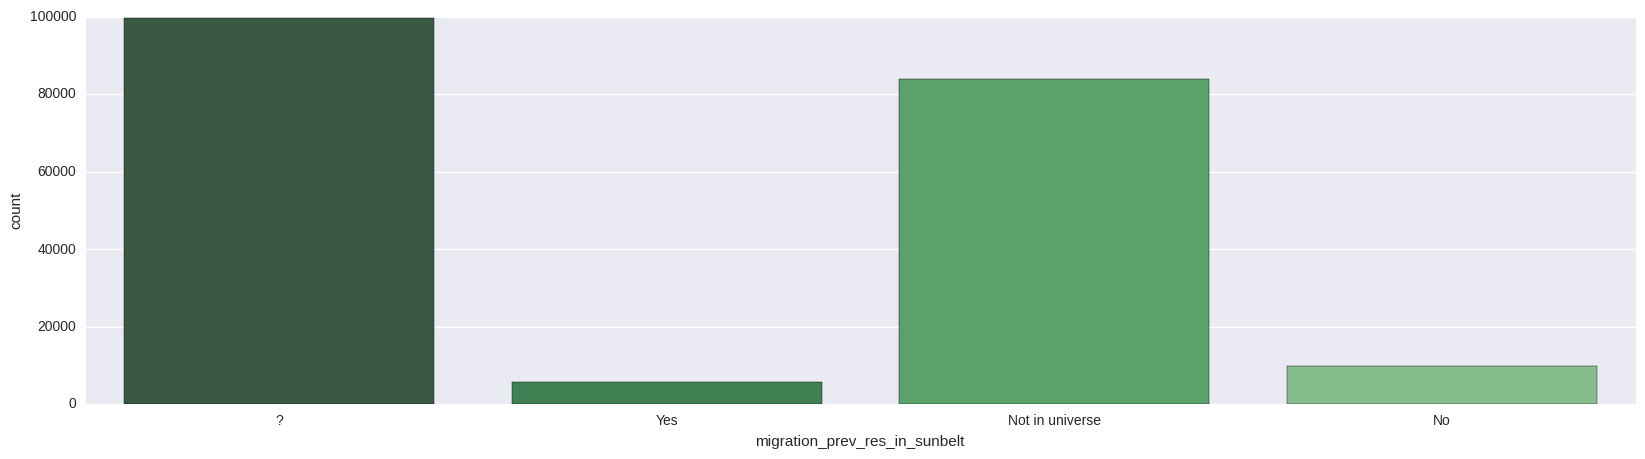

In [69]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='migration_prev_res_in_sunbelt', data=train, palette="Greens_d")
train.loc[train.migration_prev_res_in_sunbelt == '?', 'migration_prev_res_in_sunbelt'] = 'Not in universe'
train=train.replace(
    {
        'migration_prev_res_in_sunbelt': {
            'Yes': 0,
            'No': 1,
            'Not in universe': 2
            }
    }
)

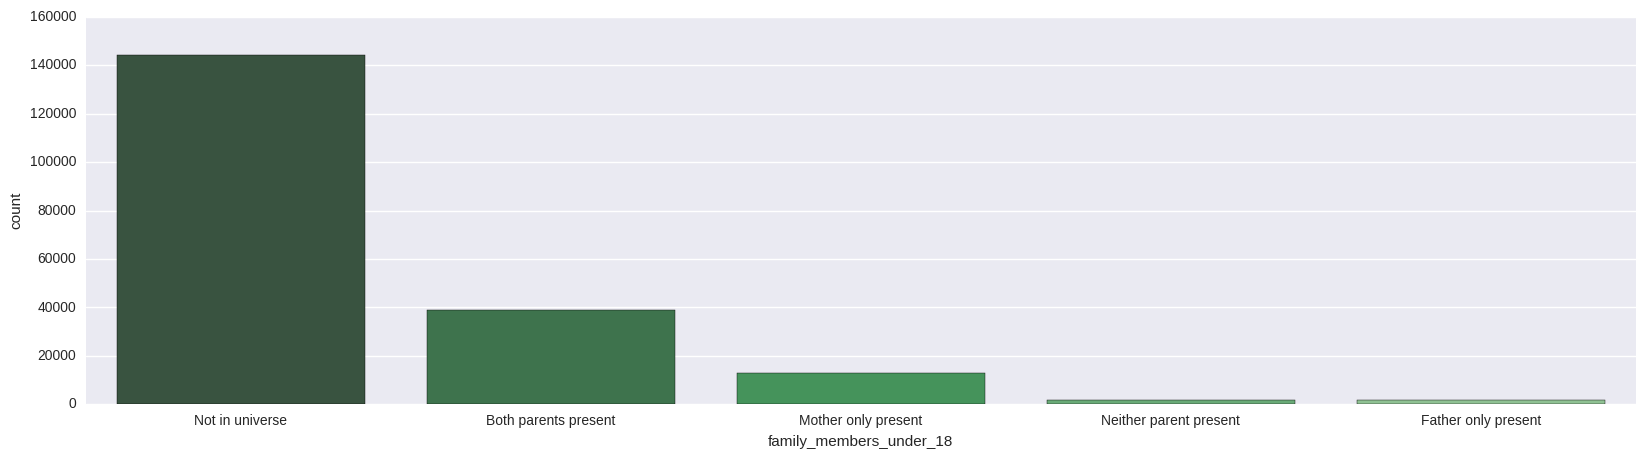

In [70]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='family_members_under_18', data=train, palette="Greens_d")
train=train.replace(
    {
        'family_members_under_18': {
            'Father only present': 0,
            'Neither parent present': 0,
            'Mother only present': 1,
            'Both parents present': 2,
            'Not in universe': 3
            }
    }
)

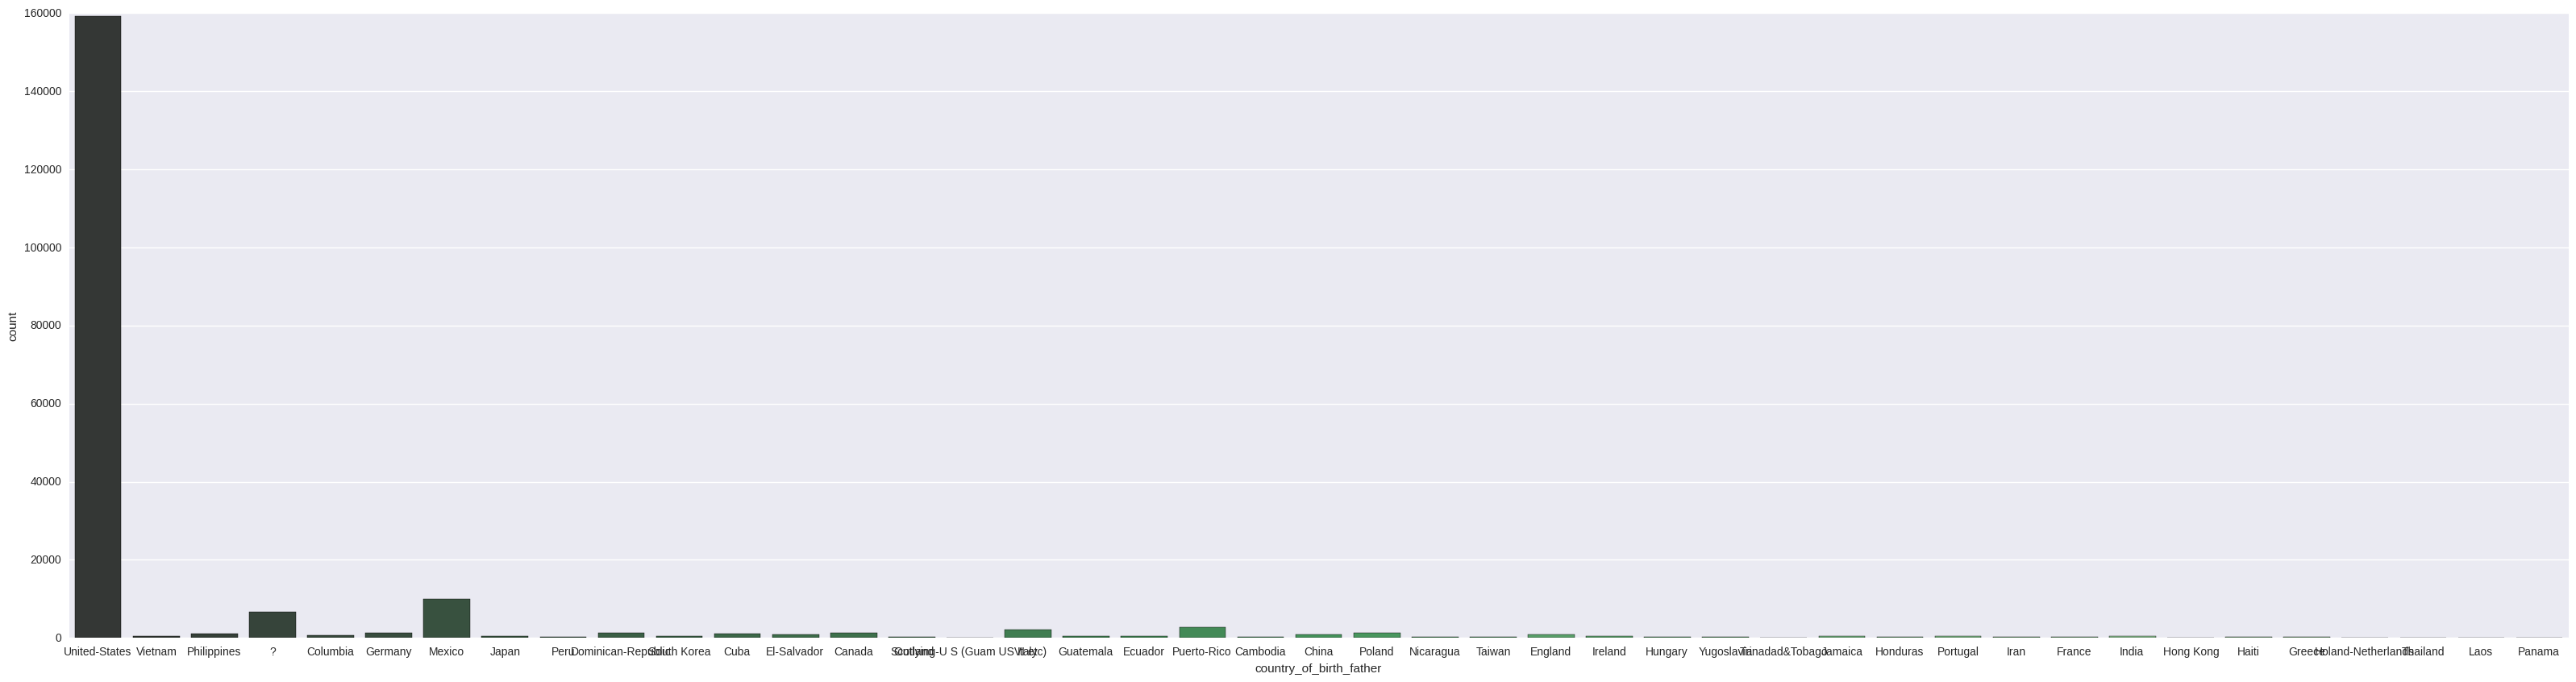

In [71]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
sns.countplot(x='country_of_birth_father', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['country_of_birth_father'])
#train = train.join('one_hot')
train['country_of_birth_father'] = one_hot

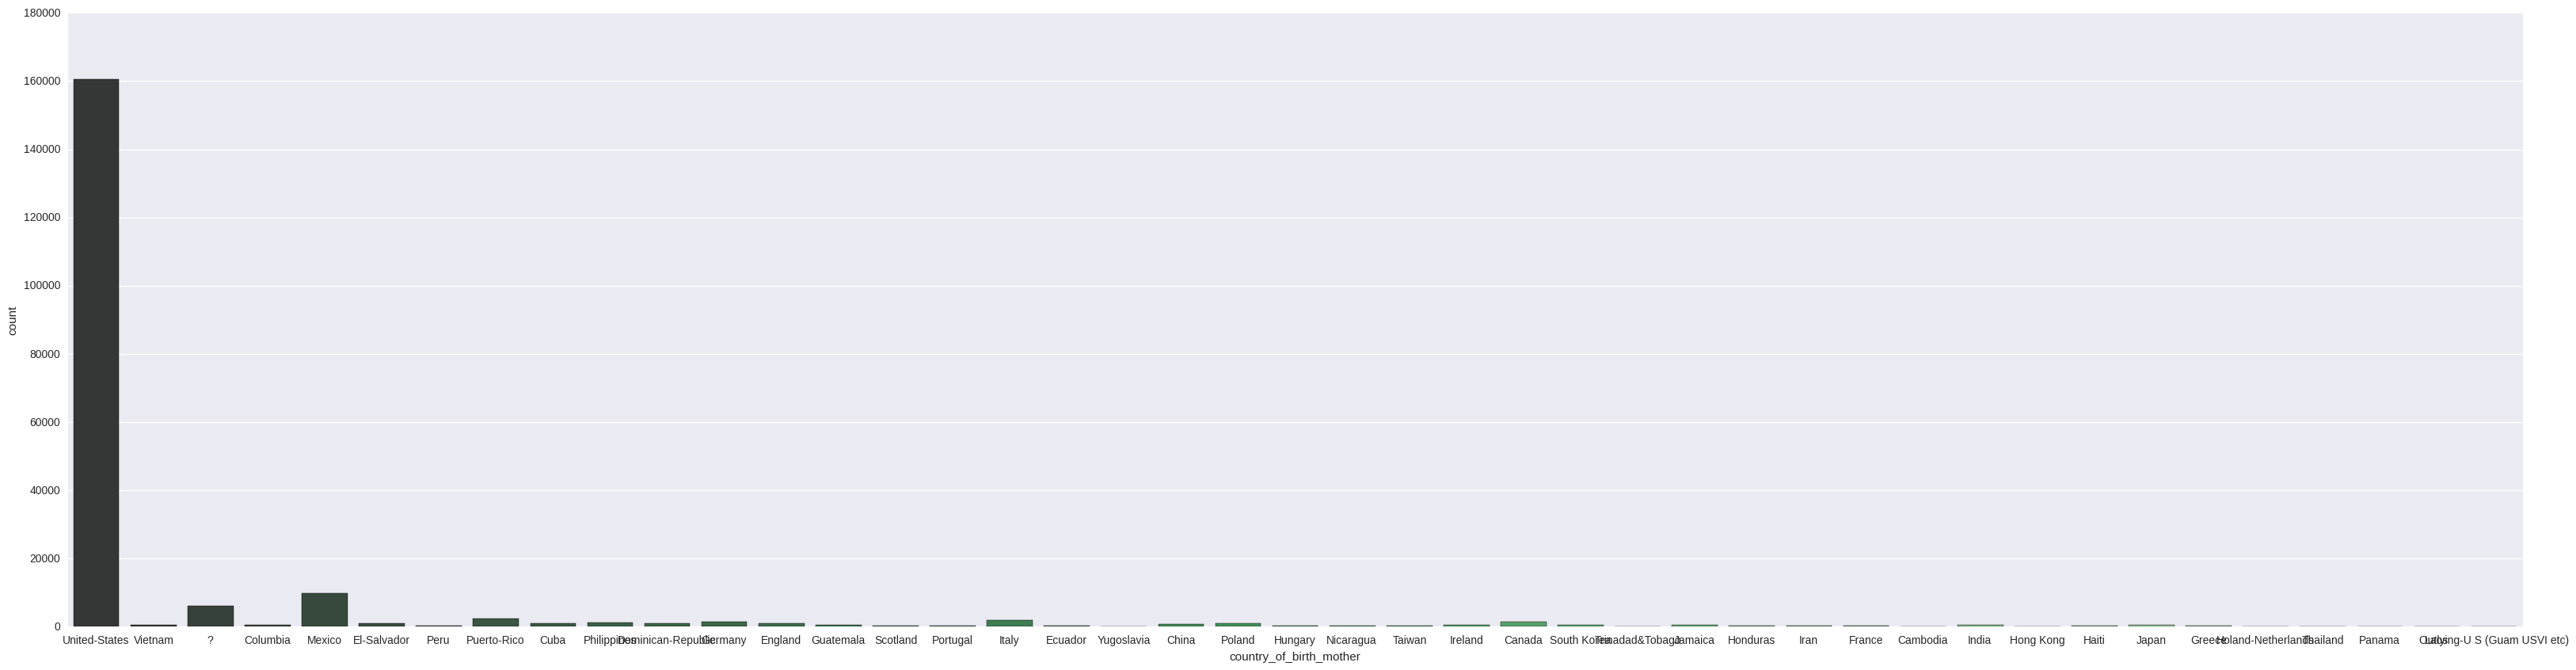

In [72]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
sns.countplot(x='country_of_birth_mother', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['country_of_birth_mother'])
#train = train.join('one_hot')
train['country_of_birth_mother'] = one_hot

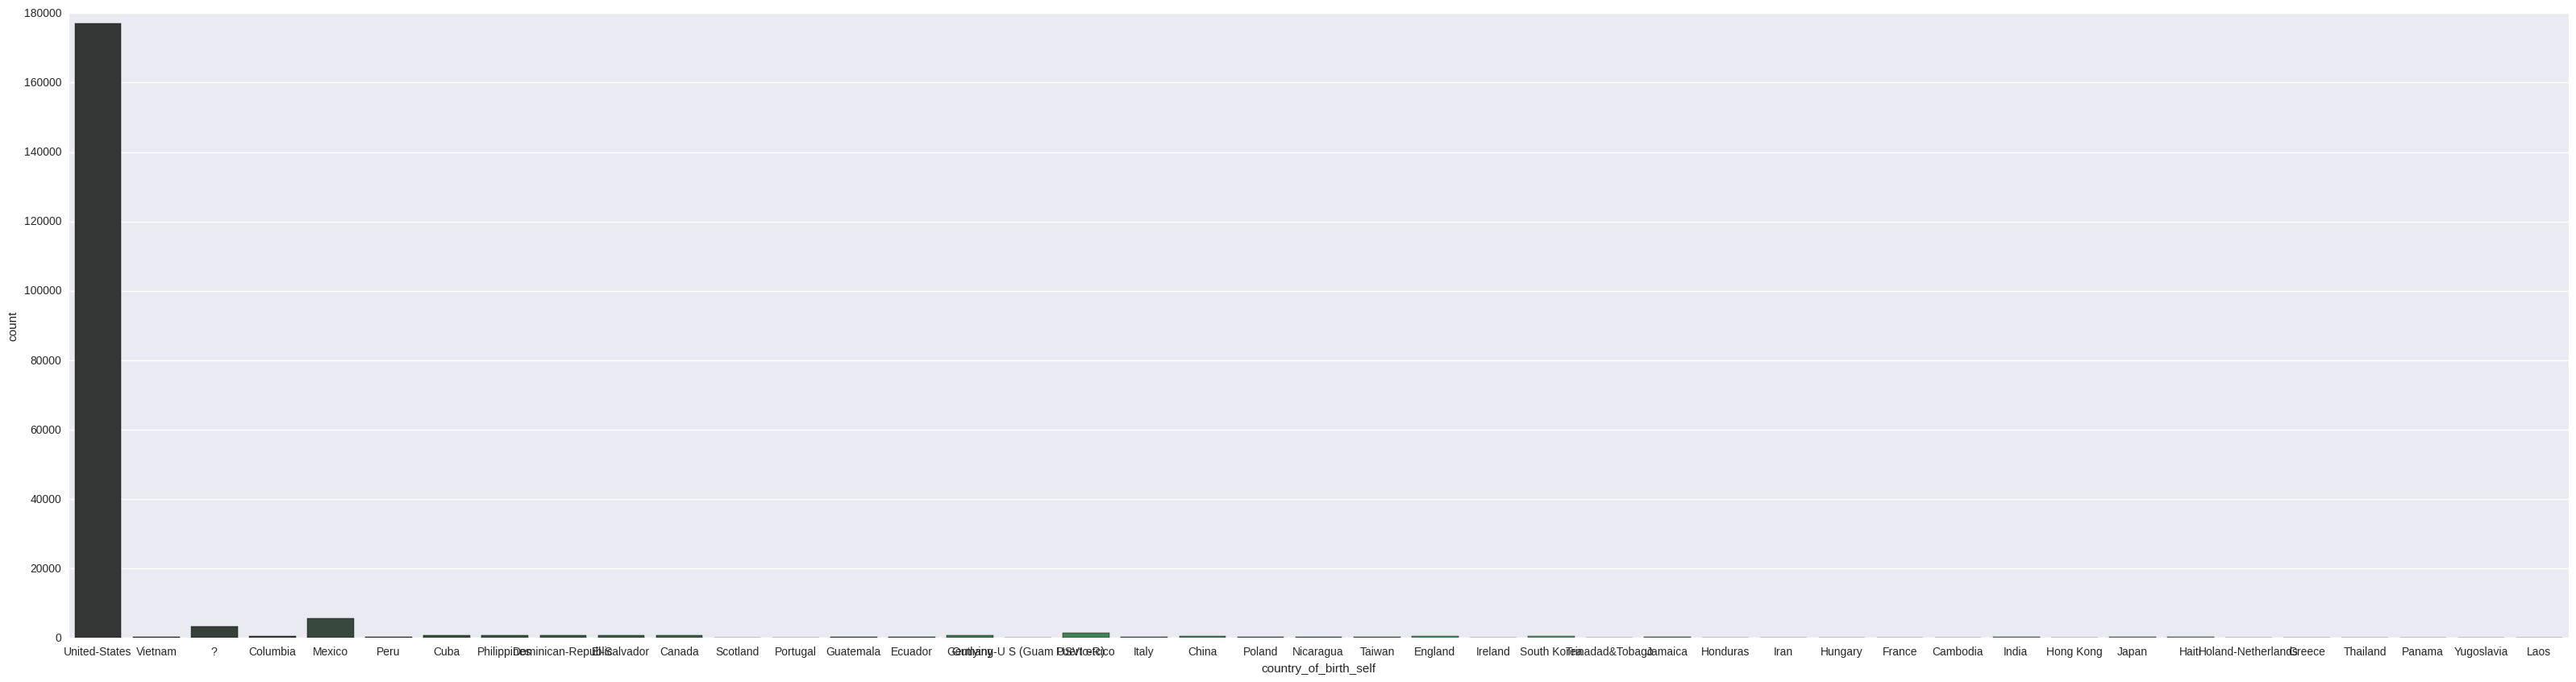

In [73]:
plt.rcParams['figure.figsize'] = (40.0, 10.0)
sns.countplot(x='country_of_birth_self', data=train, palette="Greens_d")
one_hot = pd.get_dummies(train['country_of_birth_self'])
#train = train.join('one_hot')
train['country_of_birth_self'] = one_hot

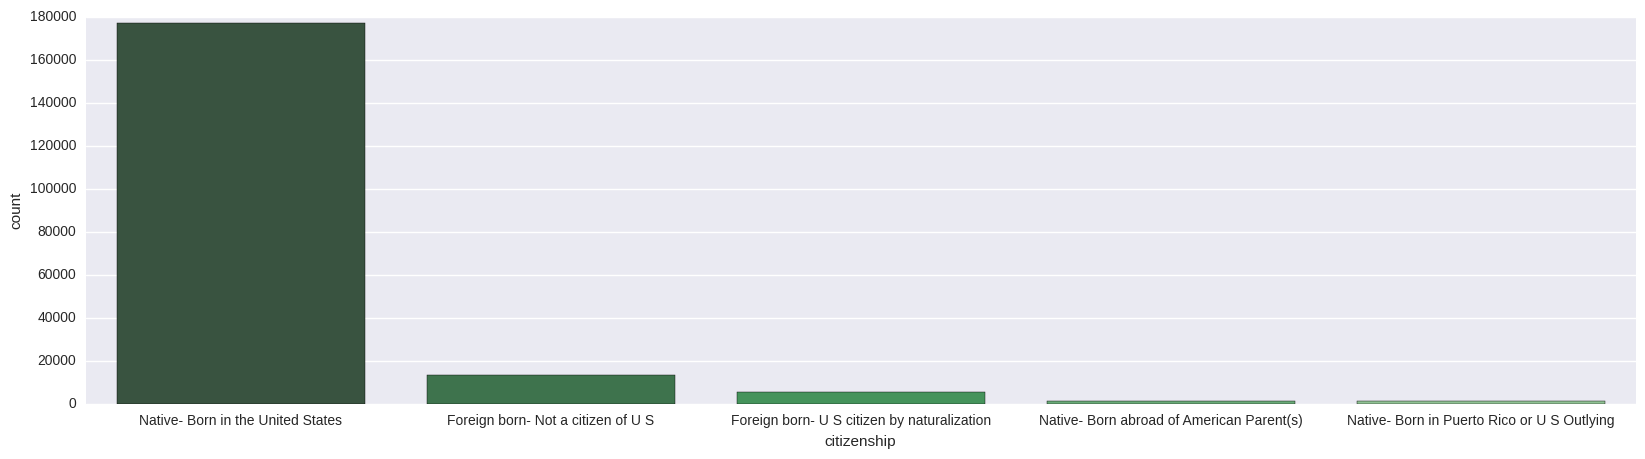

In [74]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='citizenship', data=train, palette="Greens_d")
train=train.replace(
    {
        'citizenship': {
            'Native- Born in Puerto Rico or U S Outlying': 0,
            'Native- Born abroad of American Parent(s)': 0,
            'Foreign born- U S citizen by naturalization': 1,
            'Foreign born- Not a citizen of U S': 2,
            'Native- Born in the United States': 3
            }
    }
)

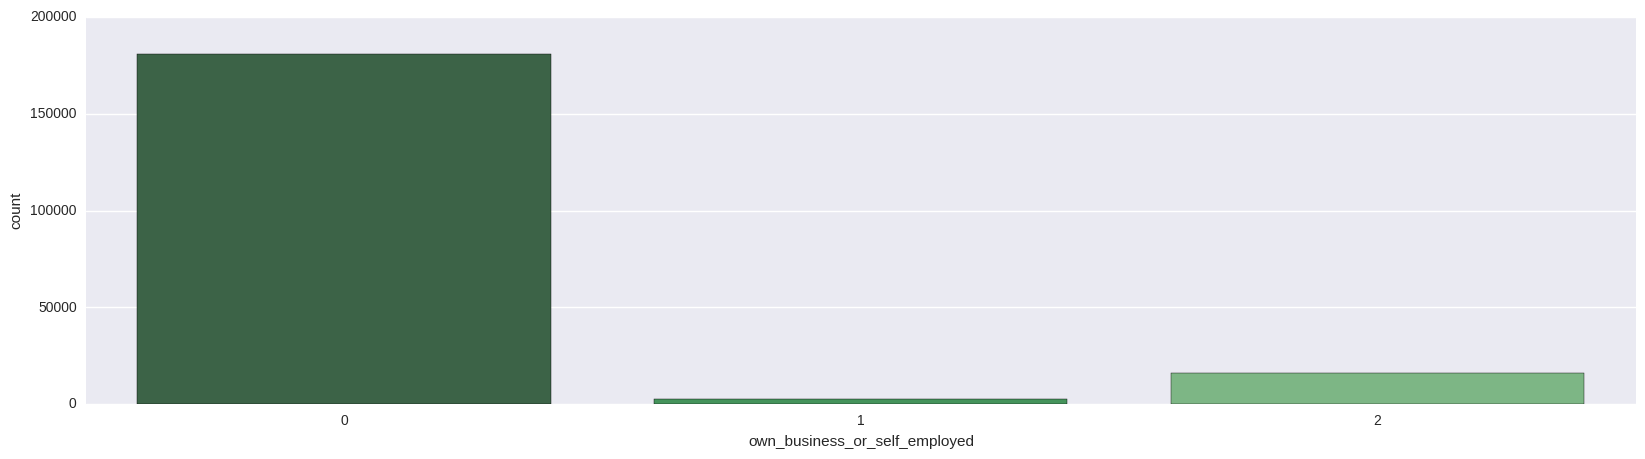

In [75]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x='own_business_or_self_employed', data=train, palette="Greens_d")

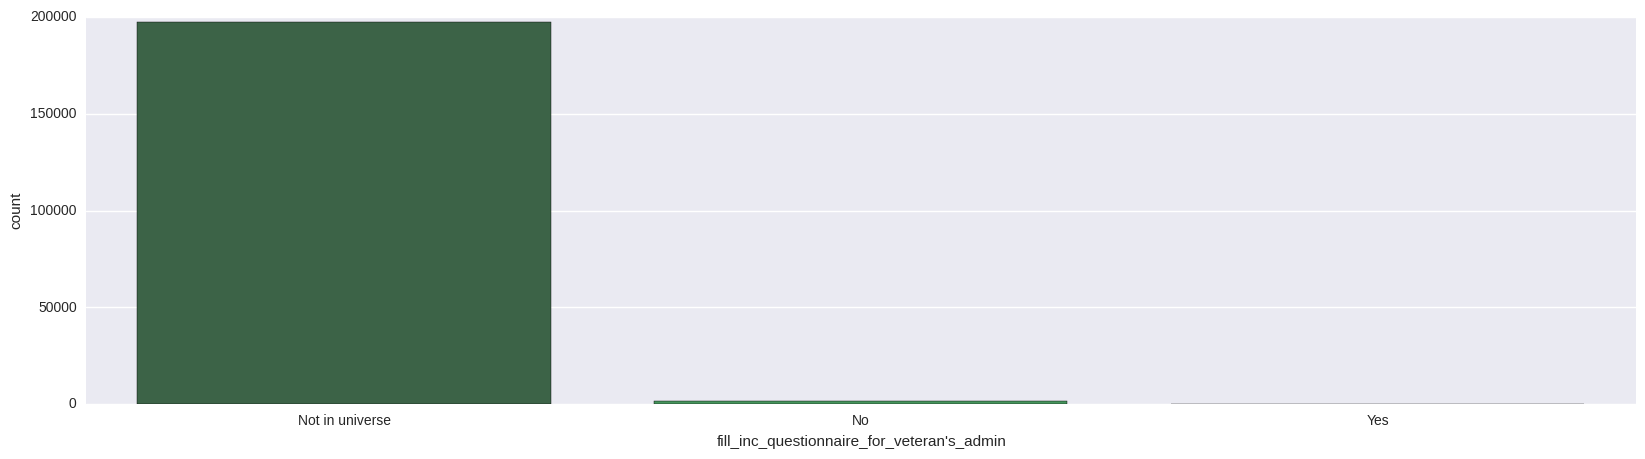

In [76]:
plt.rcParams['figure.figsize'] = (20.0, 5.0)
sns.countplot(x="fill_inc_questionnaire_for_veteran's_admin", data=train, palette="Greens_d")
train=train.replace(
    {
        "fill_inc_questionnaire_for_veteran's_admin": {
            'Yes': 0,
            'No': 1,
            'Not in universe': 2
            }
    }
)

In [77]:
train=train.drop('instance_weight', axis=1)
train=train.drop('num_persons_worked_for_employer', axis=1)
train=train.drop('weeks_worked_in_year', axis=1)

In [78]:
train.to_csv('train.csv', index = False)